In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger')
import imageio

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
data=pd.read_csv('textResponses.csv')

In [3]:
data['pattern']=''
for i in range(len(data)):
    try:
        data['Duration (sec)'][i]=float(data['Duration (sec)'][i])
    except:
        data['Duration (sec)'][i]=0.0
    if data['Level (Assignment)'][i][-1]=='n':
        data['pattern'][i]='collaborative'
    elif data['Level (Assignment)'][i][-1]=='l':
        data['pattern'][i]='individual'
    else:
        data['pattern'][i]='test'

D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\anaconda\envs\torch\lib\site-packages\ipy

In [4]:
group_data=data.groupby(['Anon Student Id','Level (Assignment)','Problem Name'])[['Duration (sec)','pattern','Input','Problem Name']]

In [5]:
group_data.head()

,Duration (sec),pattern,Input,Problem Name
0,132.5,test,"no, because you don't change the denominater s...",5
1,581,test,I do not know this answer.,6
2,15.75,collaborative,Frist you need to double the denometor then do...,1a
3,0.333,collaborative,"First, multiply the denominater by two then do...",2a
4,11,collaborative,first muply 8 by 2 then do the same to the num...,3a
...,...,...,...,...
7324,8.8,collaborative,Use the same least common denominator,6a
7325,6.75,collaborative,DON'T ADD THE NUMERATOR,7a
7326,13.75,collaborative,the larger denominator does not always make it...,8a
7327,47.5,test,It cant be 6/13 becuase of the picture shown. ...,5


In [6]:
group_data.size()

Anon Student Id                       Level (Assignment)                  Problem Name
Stu_005a9729f8e3869ff12b105e0f7bb82e  Comparing Erroneous Collaboration   1a              1
                                                                          2a              1
                                                                          3a              1
                                                                          4a              1
                                      Equivalent Erroneous Collaboration  1a              1
                                                                                         ..
Stu_ffe4ba291fd0ec27d27a34dcceb3a617  LCD Erroneous Collaboration         8a              1
                                      Show what you know B                5               1
                                                                          6               1
                                      Show what you learned A             5          

In [7]:
data_rows=[temp_row for temp_row in group_data]

In [8]:
data_rows[4261][1]

,Row,Sample Name,Transaction Id,Anon Student Id,Session Id,Time,Time Zone,Duration (sec),Student Response Type,Student Response Subtype,...,School,Class,CF (Completion History),CF (Team ID),CF (Team Position),CF (collaborating_sessions),CF (step_id),CF (tool_event_time),CF (tutor_event_time),pattern
4453,633634,All Data,dbcbcb4adb50a232d7631c4a25e52437,Stu_98626cdff642bf9452d8627f21ace44d,Sc2a0c4d30961badacc0da419b70ada29,2/29/16 13:21,America/New_York,41,ATTEMPT,Student2,...,Collaboration at Hopewell,Marchiona 2,"1,0,0,0,0,0,0,0",SFNub3VmZmVyLFNCYWlsZXk=,2 of 2,"Sc2a0c4d30961badacc0da419b70ada29,S1679f80df32...",32.0,2016-02-29 18:21:56.537 UTC,2016-02-29 18:21:56.538 UTC,collaborative


In [9]:
from nltk.metrics import edit_distance
ind_duration_mean=[]
ind_duration_sum=[]
ind_mod_num=[]
ind_mod_ed_mean=[]
ind_mod_ed_sum=[]

col_duration_mean=[]
col_duration_sum=[]
col_mod_num=[]
col_mod_ed_mean=[]
col_mod_ed_sum=[]

for temp_row in data_rows:
    if temp_row[1].pattern.iloc[0]=='collaborative':
        temp_durance_mean=np.mean(temp_row[1]['Duration (sec)'])
        temp_durance_sum=np.sum(temp_row[1]['Duration (sec)'])
        col_duration_mean.append(temp_durance_mean)
        col_duration_sum.append(temp_durance_sum)
        
        temp_mod_num=len(temp_row[1].Input)
        temp_mod_ed_list=[]
        for temp_text in temp_row[1].Input:
            try:
                temp_ed=edit_distance(temp_text,last_text)
                temp_mod_ed_list.append(temp_ed)
            except:
                a=0
            last_text=temp_text           
        try:
            del last_text
        except:
            a=0
        temp_mod_ed_list=np.array(temp_mod_ed_list)
        if len(temp_mod_ed_list)>=1:
            temp_mod_mean=np.mean(temp_mod_ed_list)
            temp_mod_sum=np.sum(temp_mod_ed_list)
        else:
            temp_mod_mean=0
            temp_mod_sum=0
        
        col_mod_num.append(temp_mod_num-1)
        col_mod_ed_mean.append(temp_mod_mean)
        col_mod_ed_sum.append(temp_mod_sum)
                        
            
            
                                
    elif temp_row[1].pattern.iloc[0]=='individual':
        temp_durance_mean=np.mean(temp_row[1]['Duration (sec)'])
        temp_durance_sum=np.sum(temp_row[1]['Duration (sec)'])
        ind_duration_mean.append(temp_durance_mean)
        ind_duration_sum.append(temp_durance_sum)
        
        temp_mod_num=len(temp_row[1].Input)
        temp_mod_ed_list=[]
        for temp_text in temp_row[1].Input:
            try:
                temp_ed=edit_distance(temp_text,last_text)
                temp_mod_ed_list.append(temp_ed) 
            except:
                a=0
            last_text=temp_text
        try:
            del last_text
        except:
            a=0
        temp_mod_ed_list=np.array(temp_mod_ed_list)
        if len(temp_mod_ed_list)>=1:
            temp_mod_mean=np.mean(temp_mod_ed_list)
            temp_mod_sum=np.sum(temp_mod_ed_list)
        else:
            temp_mod_mean=0
            temp_mod_sum=0
        
        ind_mod_num.append(temp_mod_num-1)
        ind_mod_ed_mean.append(temp_mod_mean)
        ind_mod_ed_sum.append(temp_mod_sum)
    
    

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 26,
}

# Mean Duration

In [11]:
stats.ttest_ind(ind_duration_mean,col_duration_mean,equal_var = False)

Ttest_indResult(statistic=-5.979947046247284, pvalue=2.393240261237353e-09)

In [12]:
stats.f_oneway(ind_duration_mean, col_duration_mean)

F_onewayResult(statistic=32.64458441692007, pvalue=1.164415287026949e-08)

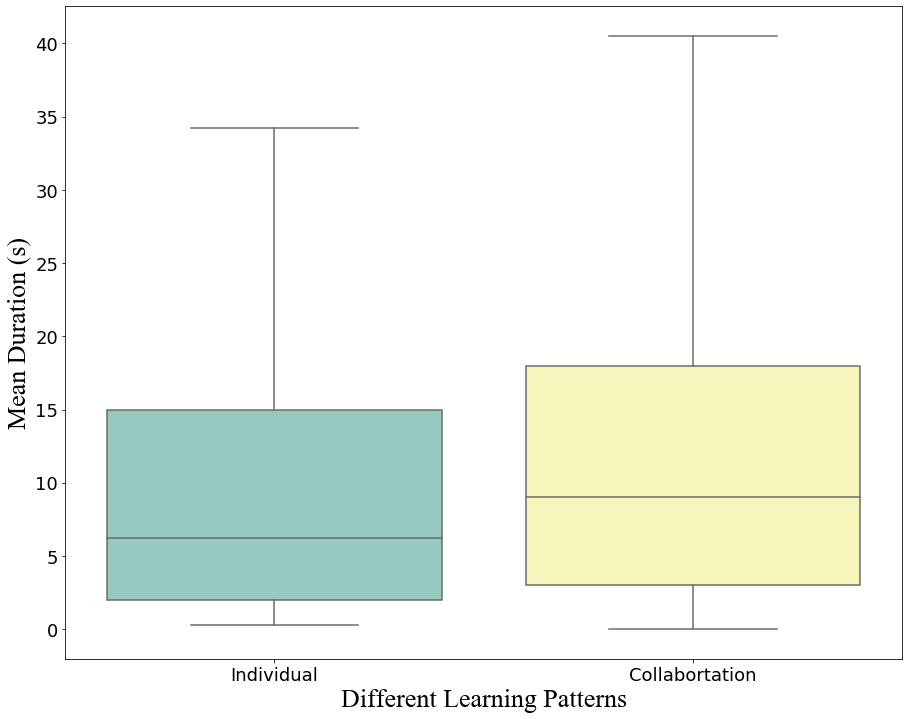

In [13]:
patterns=["Individual"]*len(ind_duration_mean)+ ['Collabortation']*len(col_duration_mean)
values=np.concatenate((ind_duration_mean,col_duration_mean))
fig,axes = plt.subplots(1,1,figsize=(15,12))
my_data = pd.DataFrame({
    "Different Learning Patterns":patterns,
    "Mean Duration (s)":values
})

ax = sns.boxplot(x="Different Learning Patterns", y="Mean Duration (s)", data=my_data,palette="Set3",showfliers = False)
#plt.ylim(-25,0)
plt.tick_params(labelsize=18)
axes.set_xlabel('Different Learning Patterns',font2)
axes.set_ylabel('Mean Duration (s)',font2)
labels = axes.get_xticklabels() + axes.get_yticklabels()
#[label.set_fontname('Times New Roman') for label in labels]

# Number of Modifications

In [14]:
stats.ttest_ind(ind_mod_num,col_mod_num,equal_var = False)

Ttest_indResult(statistic=-5.72129087229511, pvalue=1.1150229573062335e-08)

In [15]:
stats.f_oneway(ind_mod_num, col_mod_num)

F_onewayResult(statistic=23.14477638720111, pvalue=1.5425179675376835e-06)

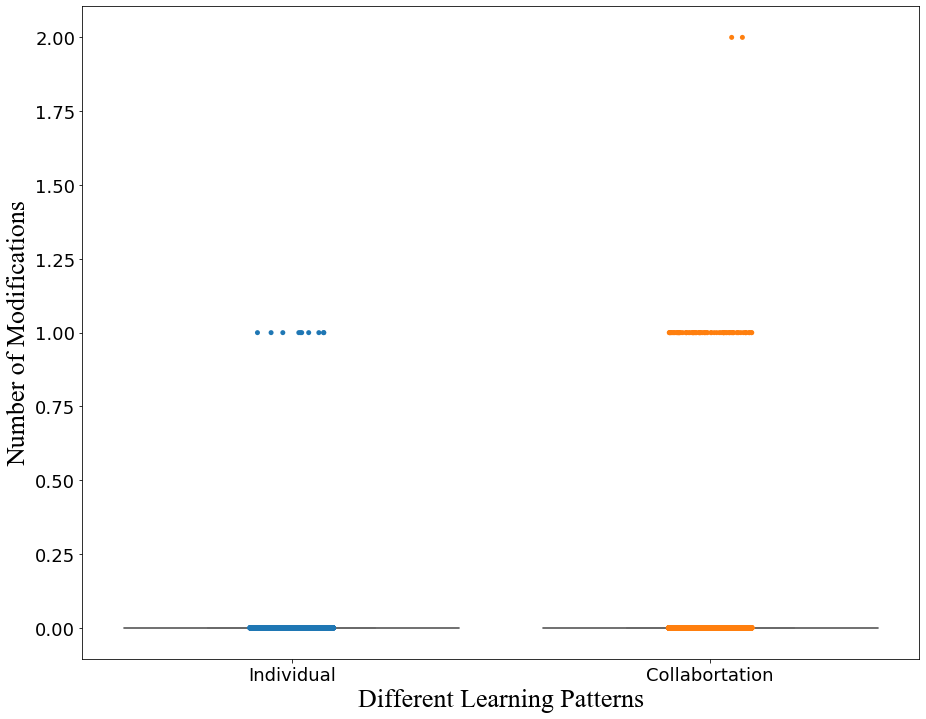

In [16]:
patterns=["Individual"]*len(ind_mod_num)+ ['Collabortation']*len(col_mod_num)
values=np.concatenate((ind_mod_num,col_mod_num))
fig,axes = plt.subplots(1,1,figsize=(15,12))
my_data = pd.DataFrame({
    "Different Learning Patterns":patterns,
    "Number of Modifications":values
})

ax = sns.boxplot(x="Different Learning Patterns", y="Number of Modifications", data=my_data,palette="Set3",showfliers = False)
#plt.ylim(-25,0)
plt.tick_params(labelsize=18)
axes.set_xlabel('Different Learning Patterns',font2)
axes.set_ylabel('Number of Modifications',font2)
labels = axes.get_xticklabels() + axes.get_yticklabels()
axes = sns.stripplot(x="Different Learning Patterns", y="Number of Modifications", data=my_data,jitter=True,edgecolor='grey',size=5)
#[label.set_fontname('Times New Roman') for label in labels]

# Mean Edit Distance of Modifications

In [17]:
ind_mod_ed_mean=np.array(ind_mod_ed_mean)
col_mod_ed_mean=np.array(col_mod_ed_mean)

In [18]:
stats.ttest_ind(ind_mod_ed_mean,col_mod_ed_mean,equal_var = False)

Ttest_indResult(statistic=-0.36753976566441554, pvalue=0.7132419366950074)

In [19]:
stats.f_oneway(ind_mod_ed_mean, col_mod_ed_mean)

F_onewayResult(statistic=0.16702050887107384, pvalue=0.6827893362226514)

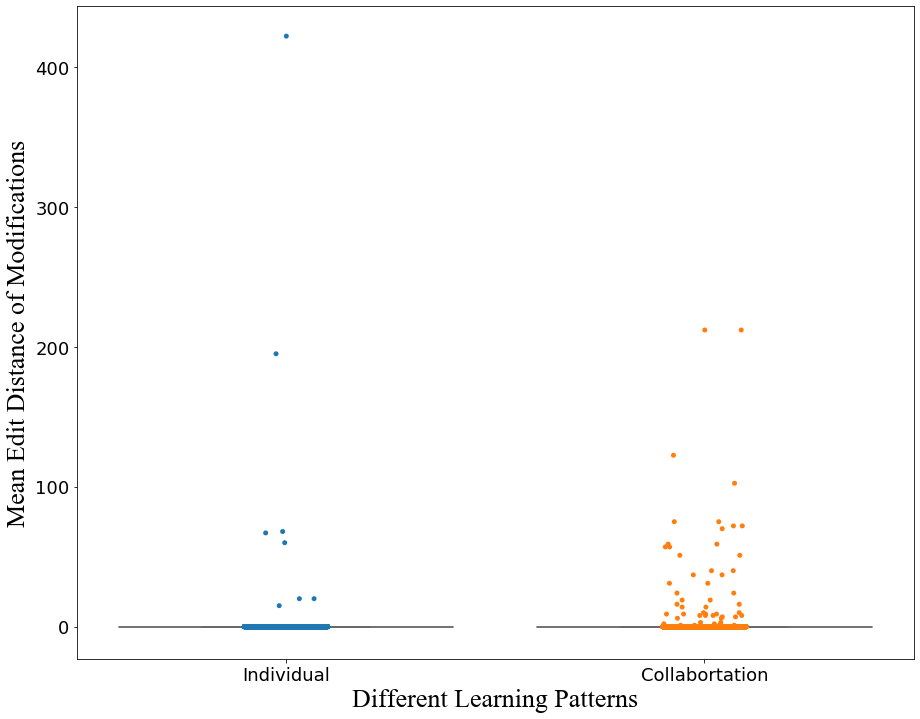

In [20]:
patterns=["Individual"]*len(ind_mod_ed_mean)+ ['Collabortation']*len(col_mod_ed_mean)
values=np.concatenate((ind_mod_ed_mean,col_mod_ed_mean))
fig,axes = plt.subplots(1,1,figsize=(15,12))
my_data = pd.DataFrame({
    "Different Learning Patterns":patterns,
    "Mean Edit Distance of Modifications":values
})

ax = sns.boxplot(x="Different Learning Patterns", y="Mean Edit Distance of Modifications", data=my_data,palette="Set3",showfliers = False)
#plt.ylim(-25,0)
plt.tick_params(labelsize=18)
axes.set_xlabel('Different Learning Patterns',font2)
axes.set_ylabel('Mean Edit Distance of Modifications',font2)
axes = sns.stripplot(x="Different Learning Patterns", y="Mean Edit Distance of Modifications", data=my_data,jitter=True,edgecolor='grey',size=5,)
labels = axes.get_xticklabels() + axes.get_yticklabels()
#[label.set_fontname('Times New Roman') for label in labels]

# Interaction effect of learning pattern

In [21]:
teach_data=pd.read_csv('prepostReducedPartial.csv')
teach_data.head()

,Student_ID,Time,Type,Test,Class,Teacher,SchoolDistrict,AssignedCondition,ActualCondition,Dyad,...,ErrorsLCDErroneous,ErrorsLCDProcedural,ErrorsErroneous,ErrorsProcedural,ErrorsTotal,WrittenLength,StudentDuration,ClassDuration,TotalPercentStudentDuration,TotalPercentClassDuration
0,Stu_005a9729f8e3869ff12b105e0f7bb82e,Pretest,A,Pretest A,Deley,Deley,Montour,M,M,430.0,...,42,13,122,28,150,104.0,32,36,0.006944,NaN
1,Stu_005a9729f8e3869ff12b105e0f7bb82e,Posttest,B,Posttest B,Deley,Deley,Montour,M,M,430.0,...,42,13,122,28,150,26.0,26,61,0.029440,NaN
2,Stu_03af0deb60a1b42c70c4d71b3f9f8bed,Pretest,B,Pretest B,Shields,Shields,Lebanon,I,I,NaN,...,45,14,91,133,224,135.0,32,48,0.003472,NaN
3,Stu_03af0deb60a1b42c70c4d71b3f9f8bed,Posttest,A,Posttest A,Shields,Shields,Lebanon,I,I,NaN,...,45,14,91,133,224,78.0,27,43,0.019204,NaN
4,Stu_03c1e9a4dde8c645a7554f75a1f33ea7,Pretest,A,Pretest A,Marchiona 1,Marchiona,Hopewell,M,M,431.0,...,13,5,60,19,79,201.0,38,1152,0.003899,NaN


In [22]:
teach_data.Teacher.value_counts()

Marchiona      122
Rongaus         78
Huffman         40
Ewonce          38
Giovannitti     36
Rinier          36
Genes           34
Pucka           34
Rindels         34
Brallier        32
Deley           32
Shaffer         26
Pilyih          26
Herrington      24
Shields         22
Name: Teacher, dtype: int64

In [23]:
teach_data_reduced=teach_data[teach_data.Time=='Pretest'][['Student_ID','Teacher','Gender','Grade']]
teach_data_reduced=teach_data_reduced.rename(index=str, columns={'Grade':'age'})
data=data.rename(index=str, columns={"Anon Student Id": "Student_ID"})
new_data=pd.merge(data, teach_data_reduced, on='Student_ID')

In [24]:
new_data

,Row,Sample Name,Transaction Id,Student_ID,Session Id,Time,Time Zone,Duration (sec),Student Response Type,Student Response Subtype,...,CF (Team ID),CF (Team Position),CF (collaborating_sessions),CF (step_id),CF (tool_event_time),CF (tutor_event_time),pattern,Teacher,Gender,age
0,196,All Data,bf7a5b63ef96de9709f1895361fb19f1,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:26,America/New_York,132.5,ATTEMPT,NaN,...,NaN,NaN,NaN,236.0,2016-05-02 16:26:26.214 UTC,2016-05-02 16:26:26.260 UTC,test,Deley,Male,4
1,197,All Data,38fee116e6f889f4f8947e8d3223c4e9,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:36,America/New_York,581,ATTEMPT,NaN,...,NaN,NaN,NaN,236.0,2016-05-02 16:36:09.528 UTC,2016-05-02 16:36:09.561 UTC,test,Deley,Male,4
2,723,All Data,614e41dfdf003a358e222dd25bd3fb37,Stu_005a9729f8e3869ff12b105e0f7bb82e,S8b8b56ba097e11d7d5e2da54ccf54883,5/4/16 12:32,America/New_York,15.75,ATTEMPT,Student2,...,RGFyaWVuWixPbGl2aWFN,1 of 2,"S8b8b56ba097e11d7d5e2da54ccf54883,S031525ce931...",32.0,2016-05-04 16:32:27.244 UTC,2016-05-04 16:32:27.258 UTC,collaborative,Deley,Male,4
3,758,All Data,d17966ae23e35d2fae1bbeb81a43420f,Stu_005a9729f8e3869ff12b105e0f7bb82e,S8b8b56ba097e11d7d5e2da54ccf54883,5/4/16 12:35,America/New_York,0.333,ATTEMPT,NaN,...,RGFyaWVuWixPbGl2aWFN,1 of 2,"S8b8b56ba097e11d7d5e2da54ccf54883,S031525ce931...",32.0,2016-05-04 16:35:03.999 UTC,2016-05-04 16:35:04.36 UTC,collaborative,Deley,Male,4
4,801,All Data,34ee74f0538238c268ee22dea94817d8,Stu_005a9729f8e3869ff12b105e0f7bb82e,S8b8b56ba097e11d7d5e2da54ccf54883,5/4/16 12:37,America/New_York,11,ATTEMPT,Student2,...,RGFyaWVuWixPbGl2aWFN,1 of 2,"S8b8b56ba097e11d7d5e2da54ccf54883,S031525ce931...",32.0,2016-05-04 16:37:25.446 UTC,2016-05-04 16:37:25.457 UTC,collaborative,Deley,Male,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5711,1027088,All Data,302d7089f553ab29edf2ee73017782a6,Stu_ff8ca883ce7d29e296f0ed8e55a3b31d,S3024508d38c730641c5f0dbb7d816e0a,5/5/16 8:57,America/New_York,7.5,ATTEMPT,Student2,...,QURpdG9ybyxSQ2Vzc25h,1 of 2,"S3024508d38c730641c5f0dbb7d816e0a,Sfa14ba6485e...",32.0,2016-05-05 12:57:01.317 UTC,2016-05-05 12:57:01.410 UTC,collaborative,Rongaus,Male,5
5712,1027197,All Data,17aeb9854ed2bd9ca3608ea5af163cf3,Stu_ff8ca883ce7d29e296f0ed8e55a3b31d,S3024508d38c730641c5f0dbb7d816e0a,5/5/16 9:02,America/New_York,6.5,ATTEMPT,Student2,...,QURpdG9ybyxSQ2Vzc25h,1 of 2,"S3024508d38c730641c5f0dbb7d816e0a,Sfa14ba6485e...",32.0,2016-05-05 13:02:49.120 UTC,2016-05-05 13:02:49.123 UTC,collaborative,Rongaus,Male,5
5713,1027258,All Data,fbe5e24bd131fa7faf3323484eebc43e,Stu_ff8ca883ce7d29e296f0ed8e55a3b31d,S3024508d38c730641c5f0dbb7d816e0a,5/5/16 9:04,America/New_York,4.75,ATTEMPT,NaN,...,QURpdG9ybyxSQ2Vzc25h,1 of 2,"S3024508d38c730641c5f0dbb7d816e0a,Sfa14ba6485e...",32.0,2016-05-05 13:04:34.486 UTC,2016-05-05 13:04:34.573 UTC,collaborative,Rongaus,Male,5
5714,1027831,All Data,e2286da6386c8c31efd53d2203ea4601,Stu_ff8ca883ce7d29e296f0ed8e55a3b31d,S85c20973b90e3b62f784ecd19838f7f4,5/6/16 10:22,America/New_York,0,ATTEMPT,NaN,...,NaN,NaN,NaN,236.0,2016-05-06 14:22:10.521 UTC,2016-05-06 14:22:10.735 UTC,test,Rongaus,Male,5


In [25]:
group_data=new_data.groupby(['Student_ID','Level (Assignment)','Problem Name'])

In [26]:
data_rows=[temp_row for temp_row in group_data]
len(data_rows)

5471

In [27]:
duration_mean=[]
duration_sum=[]
mod_num=[]
mod_ed_mean=[]
mod_ed_sum=[]

patterns=[]
genders=[]
teachers=[]
ages=[]


for temp_row in data_rows:
    if temp_row[1].pattern.iloc[0]=='collaborative' or temp_row[1].pattern.iloc[0]=='individual':
        temp_durance_mean=np.mean(temp_row[1]['Duration (sec)'])
        temp_durance_sum=np.sum(temp_row[1]['Duration (sec)'])
        duration_mean.append(temp_durance_mean)
        duration_sum.append(temp_durance_sum)

        temp_gender=temp_row[1].Gender.iloc[0]
        temp_pattern=temp_row[1].pattern.iloc[0]
        temp_teacher=temp_row[1].Teacher.iloc[0]
        temp_age=temp_row[1].age.iloc[0]
        ages.append(temp_age)
        patterns.append(temp_pattern)
        genders.append(temp_gender)
        teachers.append(temp_teacher)
        ages


        temp_mod_num=len(temp_row[1].Input)
        temp_mod_ed_list=[]
        for temp_text in temp_row[1].Input:
            try:
                temp_ed=edit_distance(temp_text,last_text)
                temp_mod_ed_list.append(temp_ed)
            except:
                a=0
            last_text=temp_text           
        try:
            del last_text
        except:
            a=0
        temp_mod_ed_list=np.array(temp_mod_ed_list)
        if len(temp_mod_ed_list)>=1:
            temp_mod_mean=np.mean(temp_mod_ed_list)
            temp_mod_sum=np.sum(temp_mod_ed_list)
        else:
            temp_mod_mean=0
            temp_mod_sum=0

        mod_num.append(temp_mod_num-1)
        mod_ed_mean.append(temp_mod_mean)
        mod_ed_sum.append(temp_mod_sum)



    

In [28]:
cnt=1
teacher_dict={}
for i in range(len(teachers)):
    temp_teacher=teachers[i]
    try:
        teachers[i]=teacher_dict[temp_teacher]
    except:
        if cnt<=10:
            teacher_dict[temp_teacher]='Teacher 0'+str(cnt)
        else:
            teacher_dict[temp_teacher]='Teacher '+str(cnt)
        teachers[i]=teacher_dict[temp_teacher]
        cnt+=1

In [29]:
ana_df=pd.DataFrame({'dur_mean':np.array(duration_mean),'dur_sum':np.array(duration_sum), 'Age Level':np.array(ages),
                   'mod_num':np.array(mod_num),'mod_ed_mean':np.array(mod_ed_mean),'mod_ed_sum':np.array(mod_ed_sum),
                  'pattern':np.array(patterns), 'teacher':np.array(teachers),'gender':np.array(genders)} )

In [30]:
def plot_learning_analysis(feature_1, feature_2, label_y):
    temp_col_df = ana_df[ana_df.pattern=='collaborative']
    temp_ind_df = ana_df[ana_df.pattern=='individual']
    temp_col_df= temp_col_df.groupby(feature_1)[[feature_2]].mean()
    #temp_col_df=pd.DataFrame({'col_'+'dur_mod':np.array(temp_col_df['dur_mod'])})
    temp_col_df=pd.DataFrame({feature_1:temp_col_df.index,'collaborative':np.array(temp_col_df[feature_2])})
    temp_ind_df= temp_ind_df.groupby(feature_1)[[feature_2]].mean()
    #temp_ind_df=pd.DataFrame({'ind_'+'dur_mod':np.array(temp_ind_df['dur_mod'])})
    temp_ind_df=pd.DataFrame({feature_1:temp_ind_df.index,'individual':np.array(temp_ind_df[feature_2])})
    temp_df=pd.merge(temp_ind_df,temp_col_df)
    temp_df.index=temp_df[feature_1]
    temp_df = temp_df.loc[:,['individual','collaborative']]
    temp_df = temp_df.stack()
    temp_df = temp_df.to_frame()
    temp_df.reset_index(inplace=True)
    temp_df.columns = temp_df.columns.astype(str)
    temp_df.rename(columns={"level_1":"pattern","0":label_y},inplace=True)
    sns.catplot(x="pattern", y=label_y, hue=feature_1,kind="point", data=temp_df)
    plt.show()
    

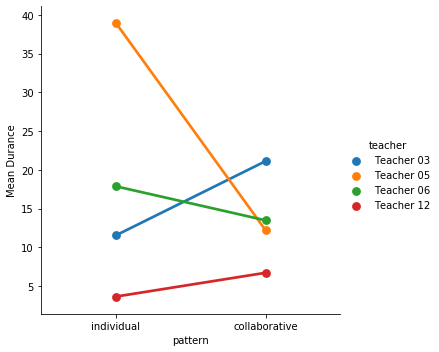

In [31]:
plot_learning_analysis('teacher','dur_mean','Mean Durance')

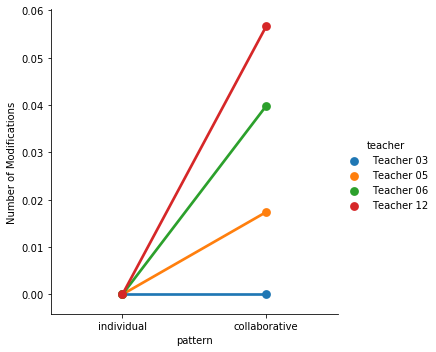

In [32]:
plot_learning_analysis('teacher','mod_num','Number of Modifications')

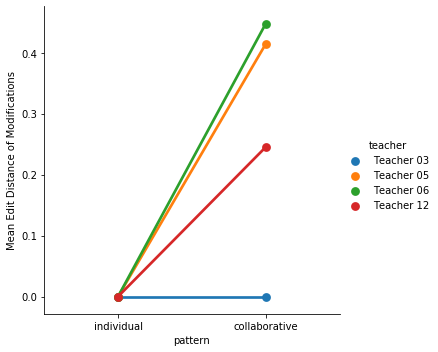

In [33]:
plot_learning_analysis('teacher','mod_ed_mean','Mean Edit Distance of Modifications')

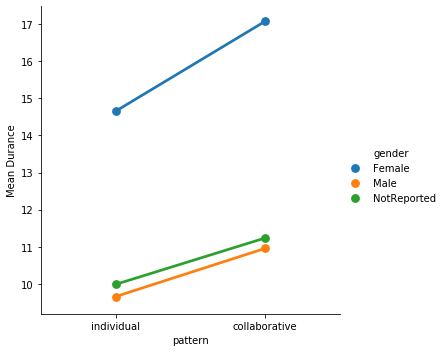

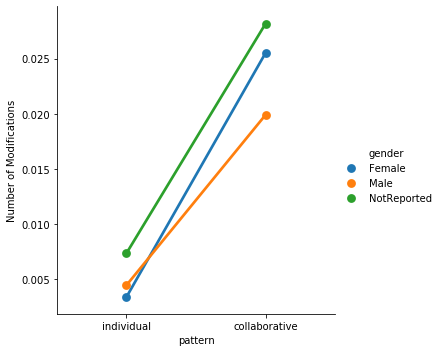

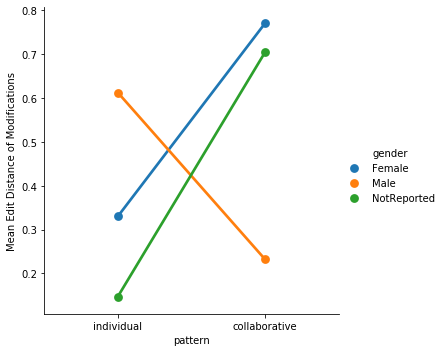

In [43]:
plot_learning_analysis('gender','dur_mean','Mean Durance')
plot_learning_analysis('gender','mod_num','Number of Modifications')
plot_learning_analysis('gender','mod_ed_mean','Mean Edit Distance of Modifications')

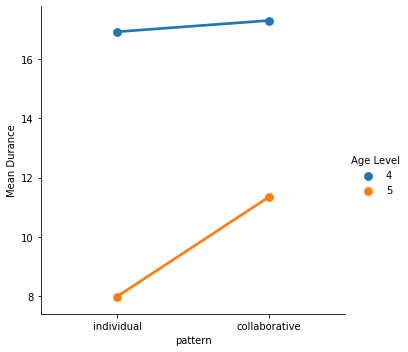

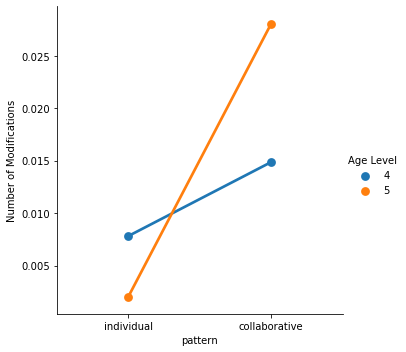

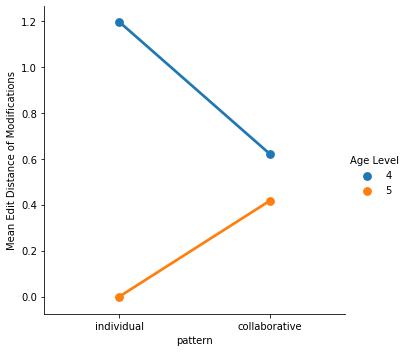

In [44]:
plot_learning_analysis('Age Level','dur_mean','Mean Durance')
plot_learning_analysis('Age Level','mod_num','Number of Modifications')
plot_learning_analysis('Age Level','mod_ed_mean','Mean Edit Distance of Modifications')

## Relationship between learning pattern and grade Improvement

In [159]:
data_1=pd.read_csv('textResponses_graded.csv')
data_1=data_1.rename(index=str, columns={"Anon Student Id": "Student_ID"})
data_1['test_type']='learning exercise'

for i in range(len(data_1)):
    try:
        data_1['Duration (sec)'][i]=float(data_1['Duration (sec)'][i])
    except:
        data_1['Duration (sec)'][i]=0.0
    if "know" in data_1['Level (Assignment)'][i]:
        data_1['test_type'][i]='pre-test'
    elif 'learned' in data_1['Level (Assignment)'][i]:
        data_1['test_type'][i]='post-test'


data_2=pd.read_csv('prepostReducedPartial.csv')
data_2['test_type']='learning exercise'

for i in range(len(data_2)):
    if "Pretest" in data_2['Test'][i]:
        data_2['test_type'][i]='pre-test'
    elif 'Posttest' in data_2['Test'][i]:
        data_2['test_type'][i]='post-test'


data_2=data_2.rename(index=str, columns={"TotalPercentage": "score",'ActualCondition':'pattern'})
data_2['score']=data_2['score']*100
data_2=data_2[['Student_ID','Teacher','Gender','score','test_type','Grade','pattern']]
data=pd.merge(data_1, data_2, on=['Student_ID','test_type'])
data.head()

D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
D:\anaconda\envs\torc

,Transaction Id,Student_ID,Session Id,Time,Time Zone,Duration (sec),Level (Assignment),Level (ProblemSet),Problem Name,Problem View,...,Is Last Attempt,Input,correctness,answerType,test_type,Teacher,Gender,score,Grade,pattern
0,bf7a5b63ef96de9709f1895361fb19f1,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:26,America/New_York,132.5,Show what you know A,Assessment_A,5,1,...,1,"no, because you don't change the denominater s...",1,p,pre-test,Deley,Male,22.222222,4,M
1,38fee116e6f889f4f8947e8d3223c4e9,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:36,America/New_York,581,Show what you know A,Assessment_A,6,1,...,1,I do not know this answer.,0,n,pre-test,Deley,Male,22.222222,4,M
2,67cf78707ccc26e1e9637cdf9cf56a38,Stu_03af0deb60a1b42c70c4d71b3f9f8bed,Sd5e01db04cd96519388d7dbf89754206,5/20/16 9:17,America/New_York,50,Show what you learned A,Assessment_A,5,1,...,1,I think her answer is right.,0,n,post-test,Shields,Male,51.851852,5,I
3,9524b2106c4398c0f080bd48595e766c,Stu_03af0deb60a1b42c70c4d71b3f9f8bed,Sd5e01db04cd96519388d7dbf89754206,5/20/16 9:20,America/New_York,63,Show what you learned A,Assessment_A,6,1,...,1,would you want to have 32/65 of somthing or 32...,0,n,post-test,Shields,Male,51.851852,5,I
4,566fa61280783e071f0dc4ccb4d51f5f,Stu_03c1e9a4dde8c645a7554f75a1f33ea7,S41b8064a1f76e5b864cd40b0f1c87db9,2/19/16 10:49,America/New_York,198,Show what you know A,Assessment_A,5,1,...,1,I think that the picture is incorrect.I think ...,0,p,pre-test,Marchiona,Female,14.814815,4,M


In [160]:
for i in range(len(data)):
    if data.pattern.iloc[i][0]=='M':
        data.pattern.iloc[i]='mixed'
    if data.pattern.iloc[i][0]=='C':
        data.pattern.iloc[i]='collaborative'
    if data.pattern.iloc[i][0]=='I':
        data.pattern.iloc[i]='individual'

D:\anaconda\envs\torch\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [161]:
'''
students=data_1.Student_ID.value_counts().index
patterns=[]
for temp_stduent in students:
    temp_levels=data_1[data_1.Student_ID==temp_stduent]['Level (Assignment)'].value_counts().index
    temp_pattern='NotReported'
    for temp_level in temp_levels:
        if 'Collaboration' in temp_level :
            temp_pattern='collaborative'
            break
        if 'Individual' in temp_level:
            temp_pattern='individual'
            break
    patterns.append(temp_pattern)
student_pattern= pd.DataFrame({
    "Student_ID":students,
    "overall_pattern":patterns
})
new_data=pd.merge(data,student_pattern,on='Student_ID')
data=new_data
data.head()
'''

'\nstudents=data_1.Student_ID.value_counts().index\npatterns=[]\nfor temp_stduent in students:\n    temp_levels=data_1[data_1.Student_ID==temp_stduent][\'Level (Assignment)\'].value_counts().index\n    temp_pattern=\'NotReported\'\n    for temp_level in temp_levels:\n        if \'Collaboration\' in temp_level :\n            temp_pattern=\'collaborative\'\n            break\n        if \'Individual\' in temp_level:\n            temp_pattern=\'individual\'\n            break\n    patterns.append(temp_pattern)\nstudent_pattern= pd.DataFrame({\n    "Student_ID":students,\n    "overall_pattern":patterns\n})\nnew_data=pd.merge(data,student_pattern,on=\'Student_ID\')\ndata=new_data\ndata.head()\n'

In [162]:
group_data=data.groupby(['Student_ID'])[['Duration (sec)','pattern','Input','Problem Name','Grade','test_type','score']]

In [163]:
data_rows=[temp_row for temp_row in group_data]

In [164]:
data_rows[3][1]

,Transaction Id,Student_ID,Session Id,Time,Time Zone,Duration (sec),Level (Assignment),Level (ProblemSet),Problem Name,Problem View,...,Is Last Attempt,Input,correctness,answerType,test_type,Teacher,Gender,score,Grade,pattern
6,66a46d326876f2d863aac6defbbd469f,Stu_04235a6a18782d9209667e4bbaeef1bd,S0a20044e774076db3dab35400c3cde38,5/23/16 9:55,America/New_York,86.5,Show what you learned A,Assessment_A,5,1,...,1,the 6 is right but the bottom is not right,0,u,post-test,Huffman,Female,43.209877,4,collaborative
7,b9121648191b26ccb3b65031bc4a1b61,Stu_04235a6a18782d9209667e4bbaeef1bd,S0a20044e774076db3dab35400c3cde38,5/23/16 9:56,America/New_York,36.5,Show what you learned A,Assessment_A,6,1,...,1,if you had a candy bar you would want bigger p...,1,c,post-test,Huffman,Female,43.209877,4,collaborative
575,e46754dbfdae3806dc9740b2113574fb,Stu_04235a6a18782d9209667e4bbaeef1bd,S64315f35a6d2932388c2a18487d6632c,5/16/16 9:44,America/New_York,41,Show what you know B,Assessment_B,5,1,...,1,no because you can not subtrack 9-4 in a fractoin,1,p,pre-test,Huffman,Female,16.049383,4,collaborative
576,f40ba38e9aa63e00c8a4229eae411e7c,Stu_04235a6a18782d9209667e4bbaeef1bd,S64315f35a6d2932388c2a18487d6632c,5/16/16 9:46,America/New_York,34.5,Show what you know B,Assessment_B,6,1,...,1,if you cut it in peaices you would have bigger...,1,c,pre-test,Huffman,Female,16.049383,4,collaborative


In [165]:
ind_improve_s=[]
col_improve_s=[]
mix_improve_s=[]
ind_improve_g=[]
col_improve_g=[]
mix_improve_g=[]

for temp_row in data_rows:
    if temp_row[1].pattern.iloc[0]=='collaborative':
        temp_df=temp_row[1]
        temp_pre=np.mean(temp_df[temp_df.test_type=='pre-test']['score'])
        temp_post=np.mean(temp_df[temp_df.test_type=='post-test']['score'])
        temp_improve=temp_post-temp_pre
        if temp_improve>=-100 and temp_improve<=100:
            col_improve_s.append(temp_improve)
            
        temp_pre=np.mean(temp_df[temp_df.test_type=='pre-test']['Grade'])
        temp_post=np.mean(temp_df[temp_df.test_type=='post-test']['Grade'])
        temp_improve=temp_post-temp_pre
        col_improve_g.append(temp_post)
        
    elif temp_row[1].pattern.iloc[0]=='individual':
        temp_df=temp_row[1]
        temp_pre=np.mean(temp_df[temp_df.test_type=='pre-test']['score'])
        temp_post=np.mean(temp_df[temp_df.test_type=='post-test']['score'])
        temp_improve=temp_post-temp_pre
        if temp_improve>=-100 and temp_improve<=100:
            ind_improve_s.append(temp_improve)
            
        temp_pre=np.mean(temp_df[temp_df.test_type=='pre-test']['Grade'])
        temp_post=np.mean(temp_df[temp_df.test_type=='post-test']['Grade'])
        temp_improve=temp_post-temp_pre
        ind_improve_g.append(temp_post)
            
    elif temp_row[1].pattern.iloc[0]=='mixed':
        temp_df=temp_row[1]
        temp_pre=np.mean(temp_df[temp_df.test_type=='pre-test']['score'])
        temp_post=np.mean(temp_df[temp_df.test_type=='post-test']['score'])
        temp_improve=temp_post-temp_pre
        if temp_improve>=-100 and temp_improve<=100:
            mix_improve_s.append(temp_improve)
            
        temp_pre=np.mean(temp_df[temp_df.test_type=='pre-test']['Grade'])
        temp_post=np.mean(temp_df[temp_df.test_type=='post-test']['Grade'])
        temp_improve=temp_post-temp_pre
        mix_improve_g.append(temp_post)

In [166]:
stats.ttest_ind(np.array(ind_improve_s),np.array(col_improve_s),equal_var = False)

Ttest_indResult(statistic=-1.749472574232558, pvalue=0.08215155189248789)

In [167]:
stats.ttest_ind(np.array(ind_improve_s),np.array(mix_improve_s),equal_var = False)

Ttest_indResult(statistic=-1.641283521002847, pvalue=0.10284093079717808)

In [168]:
stats.f_oneway(ind_improve_s, col_improve_s,mix_improve_s)

F_onewayResult(statistic=1.96082174568111, pvalue=0.14274918484748964)

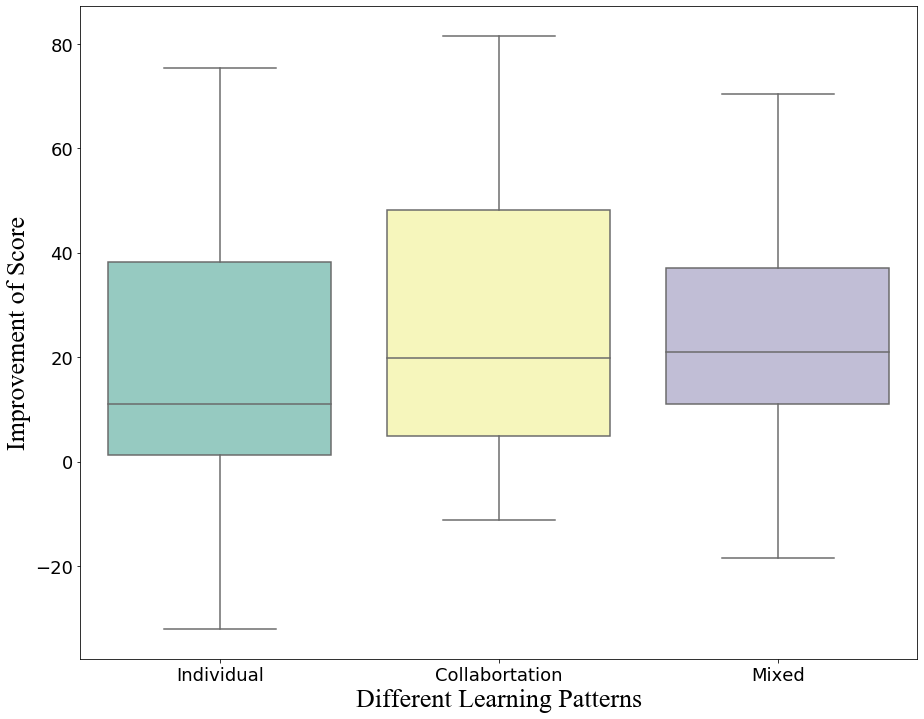

In [169]:
patterns=["Individual"]*len(ind_improve_s)+ ['Collabortation']*len(col_improve_s)+['Mixed']*len(mix_improve_s)
values=np.concatenate((ind_improve_s,col_improve_s,mix_improve_s))
fig,axes = plt.subplots(1,1,figsize=(15,12))
my_data = pd.DataFrame({
    "Different Learning Patterns":patterns,
    "Improvement of Score":values
})

ax = sns.boxplot(x="Different Learning Patterns", y="Improvement of Score", data=my_data,palette="Set3",showfliers = False)
#plt.ylim(-25,0)
plt.tick_params(labelsize=18)
axes.set_xlabel('Different Learning Patterns',font2)
axes.set_ylabel('Improvement of Score',font2)
labels = axes.get_xticklabels() + axes.get_yticklabels()
#[label.set_fontname('Times New Roman') for label in labels]

# Comparison of pre-test and post-test

In [34]:
data_1=pd.read_csv('textResponses.csv')
data_1=data_1.rename(index=str, columns={"Anon Student Id": "Student_ID"})
data_1['test_type']='learning exercise'

for i in range(len(data_1)):
    try:
        data_1['Duration (sec)'][i]=float(data_1['Duration (sec)'][i])
    except:
        data_1['Duration (sec)'][i]=0.0
    if "know" in data_1['Level (Assignment)'][i]:
        data_1['test_type'][i]='pre-test'
    elif 'learned' in data_1['Level (Assignment)'][i]:
        data_1['test_type'][i]='post-test'


data_2=pd.read_csv('prepostReducedPartial.csv')
data_2['test_type']='learning exercise'

for i in range(len(data_2)):
    if "Pretest" in data_2['Test'][i]:
        data_2['test_type'][i]='pre-test'
    elif 'Posttest' in data_2['Test'][i]:
        data_2['test_type'][i]='post-test'


data_2=data_2.rename(index=str, columns={"TotalPercentage": "grade",'Grade':'age'})
data_2['grade']=data_2['grade']*100
data_2=data_2[['Student_ID','Teacher','Gender','grade','test_type','age']]
data=pd.merge(data_1, data_2, on=['Student_ID','test_type'])
data.head()

D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
D:\anaconda\envs\torc

,Row,Sample Name,Transaction Id,Student_ID,Session Id,Time,Time Zone,Duration (sec),Student Response Type,Student Response Subtype,...,CF (Team Position),CF (collaborating_sessions),CF (step_id),CF (tool_event_time),CF (tutor_event_time),test_type,Teacher,Gender,grade,age
0,196,All Data,bf7a5b63ef96de9709f1895361fb19f1,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:26,America/New_York,132.5,ATTEMPT,NaN,...,NaN,NaN,236.0,2016-05-02 16:26:26.214 UTC,2016-05-02 16:26:26.260 UTC,pre-test,Deley,Male,22.222222,4
1,197,All Data,38fee116e6f889f4f8947e8d3223c4e9,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:36,America/New_York,581,ATTEMPT,NaN,...,NaN,NaN,236.0,2016-05-02 16:36:09.528 UTC,2016-05-02 16:36:09.561 UTC,pre-test,Deley,Male,22.222222,4
2,3315,All Data,630a500c45ba54bd7ee5f66857df6539,Stu_005a9729f8e3869ff12b105e0f7bb82e,S97c6ad0a34e051715542a93cb0af09e4,5/9/16 12:26,America/New_York,81.5,ATTEMPT,NaN,...,NaN,NaN,236.0,2016-05-09 16:26:58.846 UTC,2016-05-09 16:26:58.896 UTC,post-test,Deley,Male,76.543210,4
3,3317,All Data,9aed6b18d9bd5b6371d871736821c853,Stu_005a9729f8e3869ff12b105e0f7bb82e,S97c6ad0a34e051715542a93cb0af09e4,5/9/16 12:29,America/New_York,60.5,ATTEMPT,NaN,...,NaN,NaN,236.0,2016-05-09 16:29:02.449 UTC,2016-05-09 16:29:02.504 UTC,post-test,Deley,Male,76.543210,4
4,3983,All Data,5605ac32fa79cc8760df9c91f047dba4,Stu_03af0deb60a1b42c70c4d71b3f9f8bed,S8149b22ef12e3677674b1030a1e98fb0,5/16/16 9:42,America/New_York,151,ATTEMPT,NaN,...,NaN,NaN,236.0,2016-05-16 13:42:30.808 UTC,2016-05-16 13:42:30.850 UTC,pre-test,Shields,Male,11.111111,5


In [35]:
group_data=data.groupby(['Student_ID','Level (Assignment)','Problem Name'])[['Duration (sec)','Input','Problem Name','grade','test_type','age']]

In [36]:
data_rows=[temp_row for temp_row in group_data]
data_rows[0][1]

,Row,Sample Name,Transaction Id,Student_ID,Session Id,Time,Time Zone,Duration (sec),Student Response Type,Student Response Subtype,...,CF (Team Position),CF (collaborating_sessions),CF (step_id),CF (tool_event_time),CF (tutor_event_time),test_type,Teacher,Gender,grade,age
0,196,All Data,bf7a5b63ef96de9709f1895361fb19f1,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:26,America/New_York,132.5,ATTEMPT,NaN,...,NaN,NaN,236.0,2016-05-02 16:26:26.214 UTC,2016-05-02 16:26:26.260 UTC,pre-test,Deley,Male,22.222222,4


In [37]:
from nltk.metrics import edit_distance
pre_duration_mean=[]
pre_duration_sum=[]
pre_mod_num=[]
pre_mod_ed_mean=[]
pre_mod_ed_sum=[]
pre_grade=[]

post_duration_mean=[]
post_duration_sum=[]
post_mod_num=[]
post_mod_ed_mean=[]
post_mod_ed_sum=[]
post_grade=[]

for temp_row in data_rows:
    if temp_row[1].test_type.iloc[0]=='pre-test':
        temp_mean_grade=np.max(temp_row[1]['grade'])
        pre_grade.append(temp_mean_grade)
        
        temp_durance_mean=np.mean(temp_row[1]['Duration (sec)'])
        temp_durance_sum=np.sum(temp_row[1]['Duration (sec)'])
        pre_duration_mean.append(temp_durance_mean)
        pre_duration_sum.append(temp_durance_sum)
        
        temp_mod_num=len(temp_row[1].Input)
        temp_mod_ed_list=[]
        for temp_text in temp_row[1].Input:
            try:
                temp_ed=edit_distance(temp_text,last_text)
                temp_mod_ed_list.append(temp_ed)
            except:
                a=0
            last_text=temp_text           
        try:
            del last_text
        except:
            a=0
        temp_mod_ed_list=np.array(temp_mod_ed_list)
        if len(temp_mod_ed_list)>=1:
            temp_mod_mean=np.mean(temp_mod_ed_list)
            temp_mod_sum=np.sum(temp_mod_ed_list)
        else:
            temp_mod_mean=0
            temp_mod_sum=0
        
        pre_mod_num.append(temp_mod_num-1)
        pre_mod_ed_mean.append(temp_mod_mean)
        pre_mod_ed_sum.append(temp_mod_sum)
                        
            
            
                                
    elif temp_row[1].test_type.iloc[0]=='post-test':
        temp_mean_grade=np.max(temp_row[1]['grade'])
        post_grade.append(temp_mean_grade)
        
        temp_durance_mean=np.mean(temp_row[1]['Duration (sec)'])
        temp_durance_sum=np.sum(temp_row[1]['Duration (sec)'])
        post_duration_mean.append(temp_durance_mean)
        post_duration_sum.append(temp_durance_sum)
        
        temp_mod_num=len(temp_row[1].Input)
        temp_mod_ed_list=[]
        for temp_text in temp_row[1].Input:
            try:
                temp_ed=edit_distance(temp_text,last_text)
                temp_mod_ed_list.append(temp_ed) 
            except:
                a=0
            last_text=temp_text
        try:
            del last_text
        except:
            a=0
        temp_mod_ed_list=np.array(temp_mod_ed_list)
        if len(temp_mod_ed_list)>=1:
            temp_mod_mean=np.mean(temp_mod_ed_list)
            temp_mod_sum=np.sum(temp_mod_ed_list)
        else:
            temp_mod_mean=0
            temp_mod_sum=0
        
        post_mod_num.append(temp_mod_num-1)
        post_mod_ed_mean.append(temp_mod_mean)
        post_mod_ed_sum.append(temp_mod_sum)
    
    

### mean durance

In [38]:
stats.ttest_ind(pre_duration_mean,post_duration_mean,equal_var = False)

Ttest_indResult(statistic=6.1870325148667344, pvalue=8.768895955625554e-10)

In [39]:
stats.f_oneway(pre_duration_mean, post_duration_mean)

F_onewayResult(statistic=39.00911844151793, pvalue=5.961539773196799e-10)

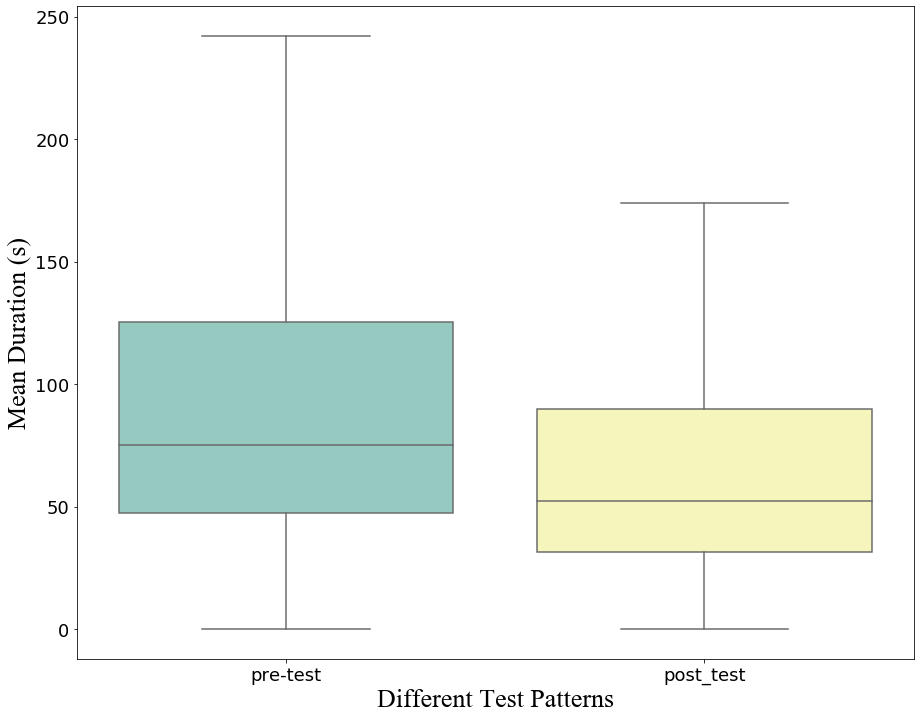

In [40]:
patterns=["pre-test"]*len(pre_duration_mean)+ ['post_test']*len(post_duration_mean)
values=np.concatenate((pre_duration_mean,post_duration_mean))
fig,axes = plt.subplots(1,1,figsize=(15,12))
my_data = pd.DataFrame({
    "Different Test Patterns":patterns,
    "Mean Duration (s)":values
})

ax = sns.boxplot(x="Different Test Patterns", y="Mean Duration (s)", data=my_data,palette="Set3",showfliers = False)
#plt.ylim(-25,0)
plt.tick_params(labelsize=18)
axes.set_xlabel('Different Test Patterns',font2)
axes.set_ylabel('Mean Duration (s)',font2)
labels = axes.get_xticklabels() + axes.get_yticklabels()
#[label.set_fontname('Times New Roman') for label in labels]

### Number of modifications

In [41]:
stats.ttest_ind(pre_mod_num,post_mod_num,equal_var = False)

Ttest_indResult(statistic=2.0267337740735982, pvalue=0.0429455036415282)

In [42]:
stats.f_oneway(pre_mod_num, post_mod_num)

F_onewayResult(statistic=4.202821401547701, pvalue=0.04058714356004877)

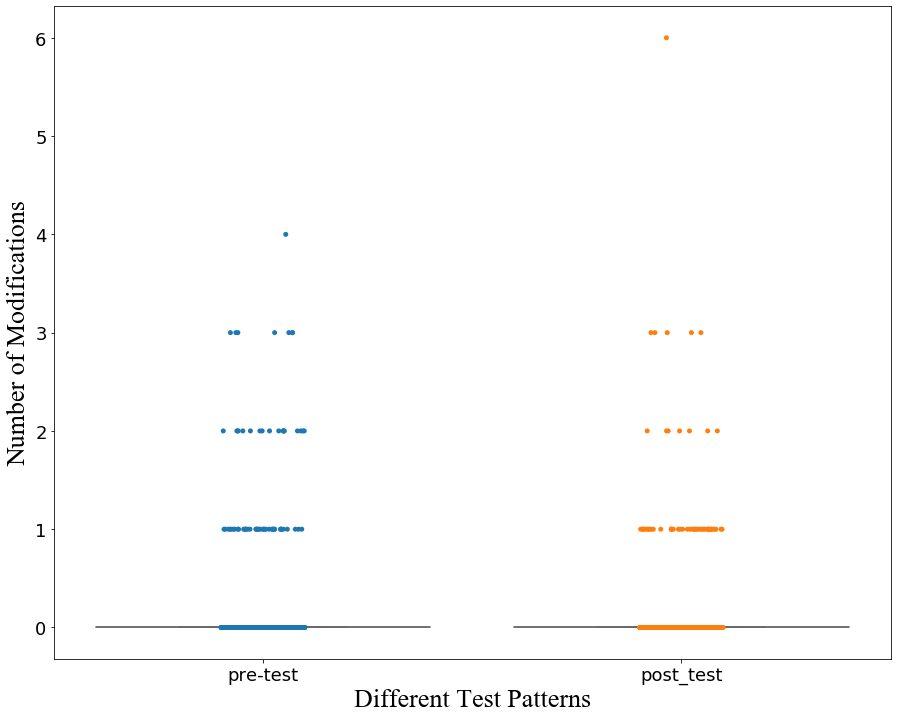

In [43]:
patterns=["pre-test"]*len(pre_mod_num)+ ['post_test']*len(post_mod_num)
values=np.concatenate((pre_mod_num,post_mod_num))
fig,axes = plt.subplots(1,1,figsize=(15,12))
my_data = pd.DataFrame({
    "Different Test Patterns":patterns,
    "Number of Modifications":values
})

ax = sns.boxplot(x="Different Test Patterns", y="Number of Modifications", data=my_data,palette="Set3",showfliers = False)
#plt.ylim(-25,0)
plt.tick_params(labelsize=18)
axes.set_xlabel('Different Test Patterns',font2)
axes.set_ylabel('Number of Modifications',font2)
axes = sns.stripplot(x="Different Test Patterns", y="Number of Modifications", data=my_data,jitter=True,edgecolor='grey',size=5)
labels = axes.get_xticklabels() + axes.get_yticklabels()
#[label.set_fontname('Times New Roman') for label in labels]

### mean edit distance

In [44]:
stats.ttest_ind(pre_mod_ed_mean,post_mod_ed_mean,equal_var = False)

Ttest_indResult(statistic=2.5216958673509824, pvalue=0.01186844210718513)

In [45]:
stats.f_oneway(pre_mod_ed_mean, post_mod_ed_mean)

F_onewayResult(statistic=6.813293814344277, pvalue=0.009167852318527103)

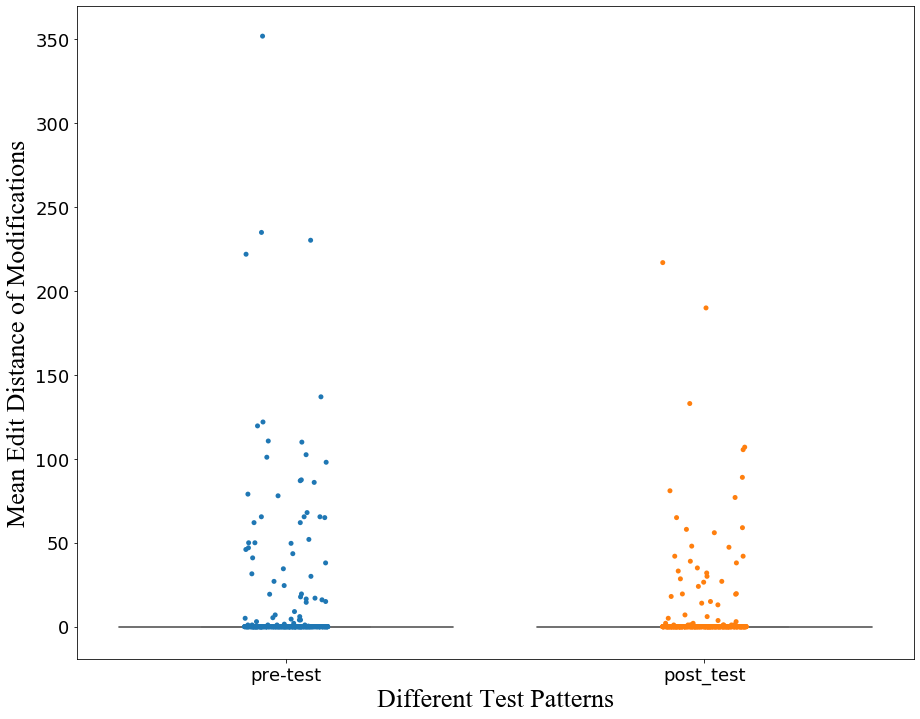

In [46]:
patterns=["pre-test"]*len(pre_mod_ed_mean)+ ['post_test']*len(post_mod_ed_mean)
values=np.concatenate((pre_mod_ed_mean,post_mod_ed_mean))
fig,axes = plt.subplots(1,1,figsize=(15,12))
my_data = pd.DataFrame({
    "Different Test Patterns":patterns,
    "Mean Edit Distance of Modifications":values
})

ax = sns.boxplot(x="Different Test Patterns", y="Mean Edit Distance of Modifications", data=my_data,palette="Set3",showfliers = False)
#plt.ylim(-25,0)
plt.tick_params(labelsize=18)
axes.set_xlabel('Different Test Patterns',font2)
axes.set_ylabel('Mean Edit Distance of Modifications',font2)
axes = sns.stripplot(x="Different Test Patterns", y="Mean Edit Distance of Modifications", data=my_data,jitter=True,edgecolor='grey',size=5)
labels = axes.get_xticklabels() + axes.get_yticklabels()
#[label.set_fontname('Times New Roman') for label in labels]

### grade

In [47]:
stats.ttest_ind(pre_grade,post_grade,equal_var = False)

Ttest_indResult(statistic=-15.766154142667608, pvalue=1.136875839400339e-50)

In [48]:
stats.f_oneway(pre_grade, post_grade)

F_onewayResult(statistic=248.86252318936053, pvalue=8.041448574097792e-51)

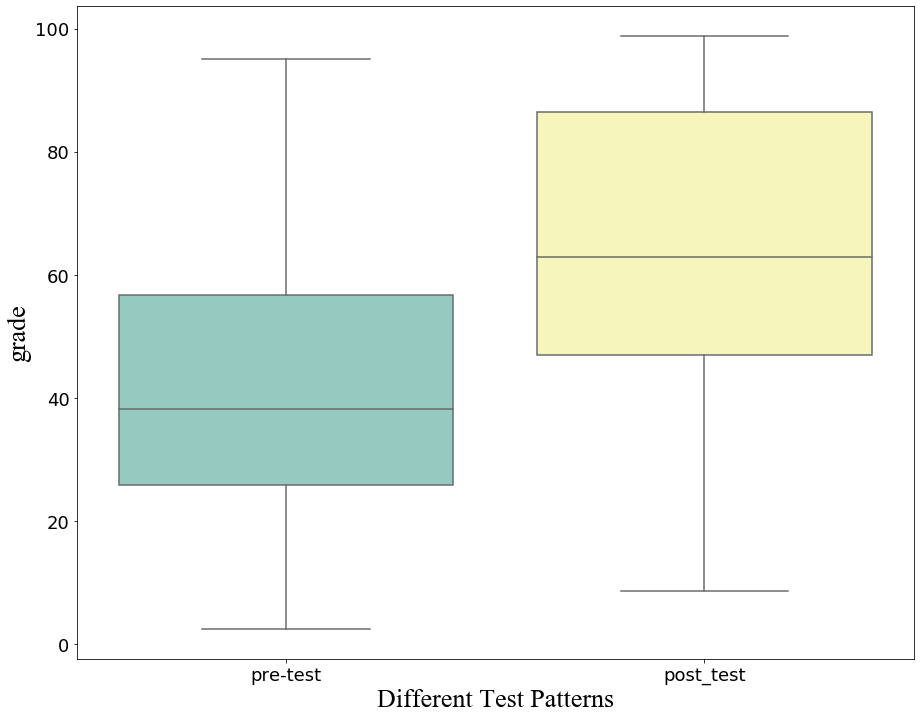

In [49]:
patterns=["pre-test"]*len(pre_grade)+ ['post_test']*len(post_grade)
values=np.concatenate((pre_grade,post_grade))
fig,axes = plt.subplots(1,1,figsize=(15,12))
my_data = pd.DataFrame({
    "Different Test Patterns":patterns,
    "grade":values
})

ax = sns.boxplot(x="Different Test Patterns", y="grade", data=my_data,palette="Set3",showfliers = False)
#plt.ylim(-25,0)
plt.tick_params(labelsize=18)
axes.set_xlabel('Different Test Patterns',font2)
axes.set_ylabel('grade',font2)
labels = axes.get_xticklabels() + axes.get_yticklabels()
#[label.set_fontname('Times New Roman') for label in labels]

# Interaction effect of test type

In [50]:
duration_mean=[]
duration_sum=[]
mod_num=[]
mod_ed_mean=[]
mod_ed_sum=[]
grades=[]

patterns=[]
genders=[]
teachers=[]
tests=[]

ages=[]


for temp_row in data_rows:
    if temp_row[1].test_type.iloc[0]=='pre-test' or temp_row[1].test_type.iloc[0]=='post-test':
        temp_durance_mean=np.mean(temp_row[1]['Duration (sec)'])
        temp_durance_sum=np.sum(temp_row[1]['Duration (sec)'])
        temp_grade=np.max(temp_row[1]['grade'])
        duration_mean.append(temp_durance_mean)
        duration_sum.append(temp_durance_sum)
        grades.append(temp_grade)

        temp_gender=temp_row[1].Gender.iloc[0]
        temp_teacher=temp_row[1].Teacher.iloc[0]
        temp_test=temp_row[1].test_type.iloc[0]
        temp_age=temp_row[1].age.iloc[0]
        ages.append(temp_age)
        genders.append(temp_gender)
        teachers.append(temp_teacher)
        tests.append(temp_test)


        temp_mod_num=len(temp_row[1].Input)
        temp_mod_ed_list=[]
        for temp_text in temp_row[1].Input:
            try:
                temp_ed=edit_distance(temp_text,last_text)
                temp_mod_ed_list.append(temp_ed)
            except:
                a=0
            last_text=temp_text           
        try:
            del last_text
        except:
            a=0
        temp_mod_ed_list=np.array(temp_mod_ed_list)
        if len(temp_mod_ed_list)>=1:
            temp_mod_mean=np.mean(temp_mod_ed_list)
            temp_mod_sum=np.sum(temp_mod_ed_list)
        else:
            temp_mod_mean=0
            temp_mod_sum=0

        mod_num.append(temp_mod_num-1)
        mod_ed_mean.append(temp_mod_mean)
        mod_ed_sum.append(temp_mod_sum)



In [55]:
cnt=1
teacher_dict={}
for i in range(len(teachers)):
    temp_teacher=teachers[i]
    try:
        teachers[i]=teacher_dict[temp_teacher]
    except:
        if cnt<10:
            teacher_dict[temp_teacher]='Teacher 0'+str(cnt)
        else:
            teacher_dict[temp_teacher]='Teacher '+str(cnt)
        teachers[i]=teacher_dict[temp_teacher]
        cnt+=1

In [56]:
ana_df=pd.DataFrame({'dur_mean':np.array(duration_mean),'dur_sum':np.array(duration_sum), 'grade':np.array(grades), 
                     'Age Level':np.array(ages),
                   'mod_num':np.array(mod_num),'mod_ed_mean':np.array(mod_ed_mean),'mod_ed_sum':np.array(mod_ed_sum),
                  'teacher':np.array(teachers),'gender':np.array(genders),'test':np.array(tests),'Age Level': np.array(ages) })


In [57]:
def plot_learning_analysis_test(feature_1, feature_2, label_y):
    temp_col_df = ana_df[ana_df.test=='pre-test']
    temp_ind_df = ana_df[ana_df.test=='post-test']
    temp_col_df= temp_col_df.groupby(feature_1)[[feature_2]].mean()
    #temp_col_df=pd.DataFrame({'col_'+'dur_mod':np.array(temp_col_df['dur_mod'])})
    temp_col_df=pd.DataFrame({feature_1:temp_col_df.index,'pre-test':np.array(temp_col_df[feature_2])})
    temp_ind_df= temp_ind_df.groupby(feature_1)[[feature_2]].mean()
    #temp_ind_df=pd.DataFrame({'ind_'+'dur_mod':np.array(temp_ind_df['dur_mod'])})
    temp_ind_df=pd.DataFrame({feature_1:temp_ind_df.index,'post-test':np.array(temp_ind_df[feature_2])})
    temp_df=pd.merge(temp_ind_df,temp_col_df)
    temp_df.index=temp_df[feature_1]
    temp_df = temp_df.loc[:,['pre-test','post-test']]
    temp_df = temp_df.stack()
    temp_df = temp_df.to_frame()
    temp_df.reset_index(inplace=True)
    temp_df.columns = temp_df.columns.astype(str)
    temp_df.rename(columns={"level_1":"test","0":label_y},inplace=True)
    sns.catplot(x="test", y=label_y, hue=feature_1,kind="point", data=temp_df)
    plt.show()
    

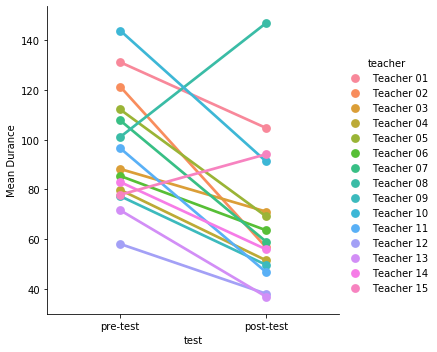

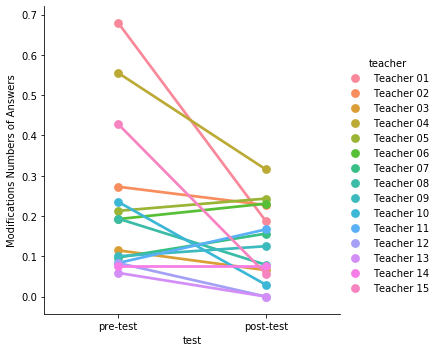

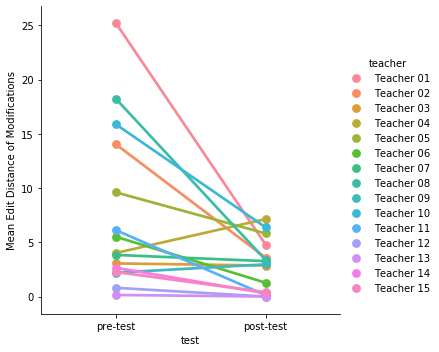

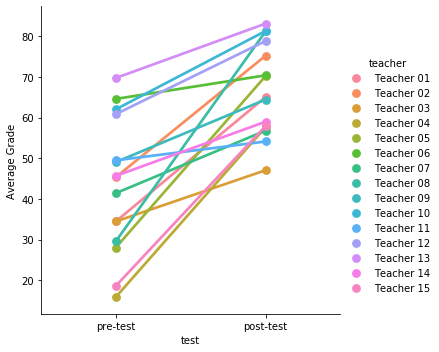

In [58]:
plot_learning_analysis_test('teacher','dur_mean','Mean Durance')
plot_learning_analysis_test('teacher','mod_num','Modifications Numbers of Answers')
plot_learning_analysis_test('teacher','mod_ed_mean','Mean Edit Distance of Modifications')
plot_learning_analysis_test('teacher','grade','Average Grade')

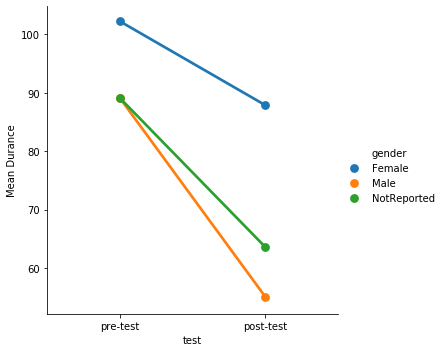

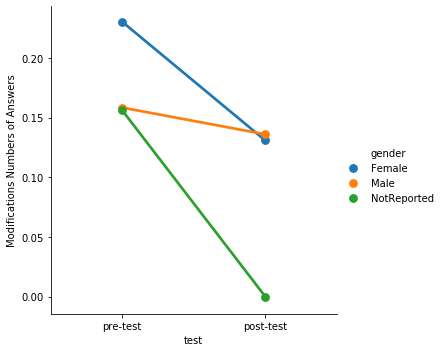

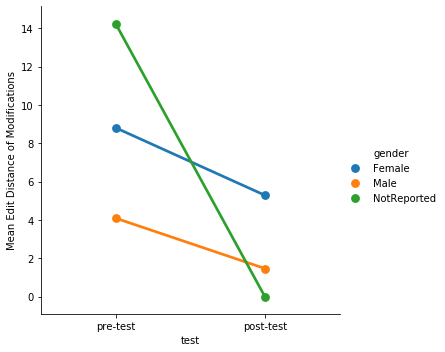

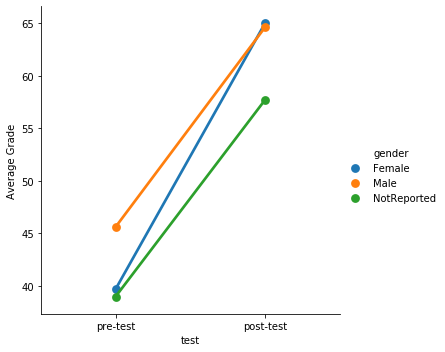

In [148]:
plot_learning_analysis_test('gender','dur_mean','Mean Durance')
plot_learning_analysis_test('gender','mod_num','Modifications Numbers of Answers')
plot_learning_analysis_test('gender','mod_ed_mean','Mean Edit Distance of Modifications')
plot_learning_analysis_test('gender','grade','Average Grade')

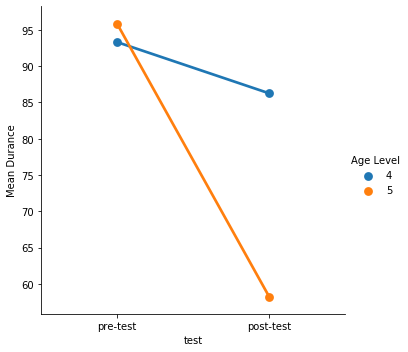

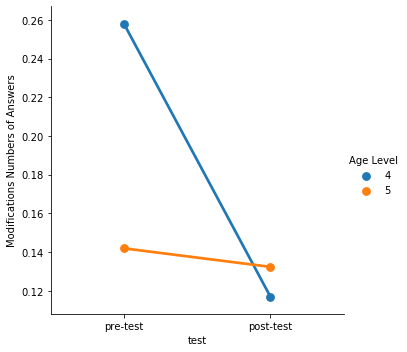

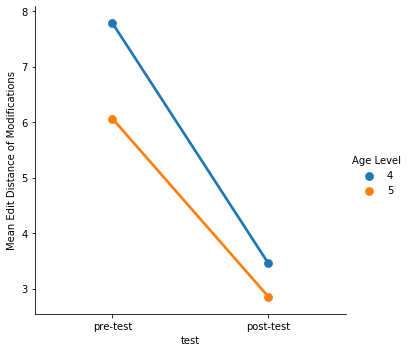

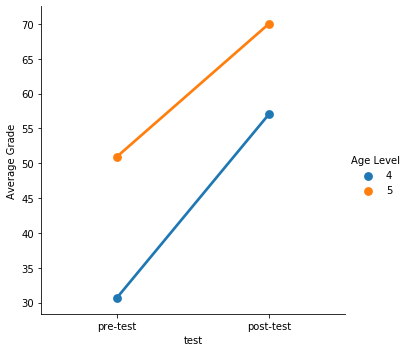

In [149]:
plot_learning_analysis_test('Age Level','dur_mean','Mean Durance')
plot_learning_analysis_test('Age Level','mod_num','Modifications Numbers of Answers')
plot_learning_analysis_test('Age Level','mod_ed_mean','Mean Edit Distance of Modifications')
plot_learning_analysis_test('Age Level','grade','Average Grade')

# Interaction effect of test type and learning pattern

In [150]:
data_1=pd.read_csv('textResponses.csv')
data_1=data_1.rename(index=str, columns={"Anon Student Id": "Student_ID"})
data_1['test_type']='learning exercise'

for i in range(len(data_1)):
    try:
        data_1['Duration (sec)'][i]=float(data_1['Duration (sec)'][i])
    except:
        data_1['Duration (sec)'][i]=0.0
    if "know" in data_1['Level (Assignment)'][i]:
        data_1['test_type'][i]='pre-test'
    elif 'learned' in data_1['Level (Assignment)'][i]:
        data_1['test_type'][i]='post-test'


data_2=pd.read_csv('prepostReducedPartial.csv')
data_2['test_type']='learning exercise'

for i in range(len(data_2)):
    if "Pretest" in data_2['Test'][i]:
        data_2['test_type'][i]='pre-test'
    elif 'Posttest' in data_2['Test'][i]:
        data_2['test_type'][i]='post-test'


data_2=data_2.rename(index=str, columns={"TotalPercentage": "score",'Grade':'age','ActualCondition':'pattern'})
data_2['score']=data_2['score']*100
data_2=data_2[['Student_ID','Teacher','Gender','score','test_type','age','pattern']]
data=pd.merge(data_1, data_2, on=['Student_ID','test_type'])
for i in range(len(data)):
    if data.pattern.iloc[i][0]=='M':
        data.pattern.iloc[i]='mixed'
    if data.pattern.iloc[i][0]=='C':
        data.pattern.iloc[i]='collaborative'
    if data.pattern.iloc[i][0]=='I':
        data.pattern.iloc[i]='individual'
data.head()

D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
D:\anaconda\envs\torc

,Row,Sample Name,Transaction Id,Student_ID,Session Id,Time,Time Zone,Duration (sec),Student Response Type,Student Response Subtype,...,CF (collaborating_sessions),CF (step_id),CF (tool_event_time),CF (tutor_event_time),test_type,Teacher,Gender,score,age,pattern
0,196,All Data,bf7a5b63ef96de9709f1895361fb19f1,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:26,America/New_York,132.5,ATTEMPT,NaN,...,NaN,236.0,2016-05-02 16:26:26.214 UTC,2016-05-02 16:26:26.260 UTC,pre-test,Deley,Male,22.222222,4,mixed
1,197,All Data,38fee116e6f889f4f8947e8d3223c4e9,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:36,America/New_York,581,ATTEMPT,NaN,...,NaN,236.0,2016-05-02 16:36:09.528 UTC,2016-05-02 16:36:09.561 UTC,pre-test,Deley,Male,22.222222,4,mixed
2,3315,All Data,630a500c45ba54bd7ee5f66857df6539,Stu_005a9729f8e3869ff12b105e0f7bb82e,S97c6ad0a34e051715542a93cb0af09e4,5/9/16 12:26,America/New_York,81.5,ATTEMPT,NaN,...,NaN,236.0,2016-05-09 16:26:58.846 UTC,2016-05-09 16:26:58.896 UTC,post-test,Deley,Male,76.543210,4,mixed
3,3317,All Data,9aed6b18d9bd5b6371d871736821c853,Stu_005a9729f8e3869ff12b105e0f7bb82e,S97c6ad0a34e051715542a93cb0af09e4,5/9/16 12:29,America/New_York,60.5,ATTEMPT,NaN,...,NaN,236.0,2016-05-09 16:29:02.449 UTC,2016-05-09 16:29:02.504 UTC,post-test,Deley,Male,76.543210,4,mixed
4,3983,All Data,5605ac32fa79cc8760df9c91f047dba4,Stu_03af0deb60a1b42c70c4d71b3f9f8bed,S8149b22ef12e3677674b1030a1e98fb0,5/16/16 9:42,America/New_York,151,ATTEMPT,NaN,...,NaN,236.0,2016-05-16 13:42:30.808 UTC,2016-05-16 13:42:30.850 UTC,pre-test,Shields,Male,11.111111,5,individual


In [151]:
group_data=data.groupby(['Student_ID','Level (Assignment)','Problem Name'])[['Duration (sec)','pattern','Input','Problem Name','test_type','score','age']]

In [152]:
data_rows=[temp_row for temp_row in group_data]

In [153]:
data_rows[3][1]

,Row,Sample Name,Transaction Id,Student_ID,Session Id,Time,Time Zone,Duration (sec),Student Response Type,Student Response Subtype,...,CF (collaborating_sessions),CF (step_id),CF (tool_event_time),CF (tutor_event_time),test_type,Teacher,Gender,score,age,pattern
3,3317,All Data,9aed6b18d9bd5b6371d871736821c853,Stu_005a9729f8e3869ff12b105e0f7bb82e,S97c6ad0a34e051715542a93cb0af09e4,5/9/16 12:29,America/New_York,60.5,ATTEMPT,NaN,...,NaN,236.0,2016-05-09 16:29:02.449 UTC,2016-05-09 16:29:02.504 UTC,post-test,Deley,Male,76.54321,4,mixed


In [154]:
duration_mean=[]
duration_sum=[]
mod_num=[]
mod_ed_mean=[]
mod_ed_sum=[]
grades=[]
scores=[]

patterns=[]
genders=[]
teachers=[]
tests=[]


for temp_row in data_rows:
    if temp_row[1].pattern.iloc[0]=='collaborative' or temp_row[1].pattern.iloc[0]=='individual' or temp_row[1].pattern.iloc[0]=='mixed':
        temp_durance_mean=np.mean(temp_row[1]['Duration (sec)'])
        temp_durance_sum=np.sum(temp_row[1]['Duration (sec)'])
        temp_grade=np.max(temp_row[1]['age'])
        temp_score=np.max(temp_row[1]['score'])
        
        duration_mean.append(temp_durance_mean)
        duration_sum.append(temp_durance_sum)
        grades.append(temp_grade)
        scores.append(temp_score)

        temp_gender=temp_row[1].Gender.iloc[0]
        temp_pattern=temp_row[1].pattern.iloc[0]
        temp_teacher=temp_row[1].Teacher.iloc[0]
        temp_test=temp_row[1].test_type.iloc[0]
        patterns.append(temp_pattern)
        genders.append(temp_gender)
        teachers.append(temp_teacher)
        tests.append(temp_test)


        temp_mod_num=len(temp_row[1].Input)
        temp_mod_ed_list=[]
        for temp_text in temp_row[1].Input:
            try:
                temp_ed=edit_distance(temp_text,last_text)
                temp_mod_ed_list.append(temp_ed)
            except:
                a=0
            last_text=temp_text           
        try:
            del last_text
        except:
            a=0
        temp_mod_ed_list=np.array(temp_mod_ed_list)
        if len(temp_mod_ed_list)>=1:
            temp_mod_mean=np.mean(temp_mod_ed_list)/len(temp_mod_ed_list+1)
            temp_mod_sum=np.sum(temp_mod_ed_list)
        else:
            temp_mod_mean=0
            temp_mod_sum=0

        mod_num.append(temp_mod_num)
        mod_ed_mean.append(temp_mod_mean)
        mod_ed_sum.append(temp_mod_sum)



In [155]:
mod_num=np.array(mod_num)-1
ana_df=pd.DataFrame({'dur_mean':np.array(duration_mean),'dur_sum':np.array(duration_sum),
                     'grade':np.array(grades),'score':np.array(scores),
                   'mod_num':np.array(mod_num),'mod_ed_mean':np.array(mod_ed_mean),'mod_ed_sum':np.array(mod_ed_sum),
                  'pattern':np.array(patterns), 'teacher':np.array(teachers),'gender':np.array(genders),'test':np.array(tests) })


In [156]:
ana_df.head()

,dur_mean,dur_sum,grade,score,mod_num,mod_ed_mean,mod_ed_sum,pattern,teacher,gender,test
0,132.5,132.5,4,22.222222,0,0.0,0,mixed,Deley,Male,pre-test
1,581.0,581.0,4,22.222222,0,0.0,0,mixed,Deley,Male,pre-test
2,81.5,81.5,4,76.543210,0,0.0,0,mixed,Deley,Male,post-test
3,60.5,60.5,4,76.543210,0,0.0,0,mixed,Deley,Male,post-test
4,151.0,151.0,5,11.111111,0,0.0,0,individual,Shields,Male,pre-test


In [157]:
def plot_learning_analysis_test_pattern( feature, label_y):
    temp_col_df = ana_df[ana_df['test']=='pre-test']
    temp_ind_df = ana_df[ana_df['test']=='post-test']
    
    temp_col_df= temp_col_df.groupby('pattern')[[feature]].mean()
    #temp_col_df=pd.DataFrame({'col_'+'dur_mod':np.array(temp_col_df['dur_mod'])})
    temp_col_df=pd.DataFrame({'pattern':temp_col_df.index,'pre-test':np.array(temp_col_df[feature])})
    
    temp_ind_df= temp_ind_df.groupby('pattern')[[feature]].mean()
    #temp_ind_df=pd.DataFrame({'ind_'+'dur_mod':np.array(temp_ind_df['dur_mod'])})
    temp_ind_df=pd.DataFrame({'pattern':temp_ind_df.index,'post-test':np.array(temp_ind_df[feature])})
    temp_df=pd.merge(temp_ind_df,temp_col_df)
    temp_df.index=temp_df['pattern']
    temp_df = temp_df.loc[:,['pre-test','post-test']]
    temp_df = temp_df.stack()
    temp_df = temp_df.to_frame()
    temp_df.reset_index(inplace=True)
    temp_df.columns = temp_df.columns.astype(str)
    temp_df.rename(columns={"level_1":"test","0":label_y},inplace=True)
    sns.catplot(x="test", y=label_y, hue='pattern',kind="point", data=temp_df)
    plt.show()

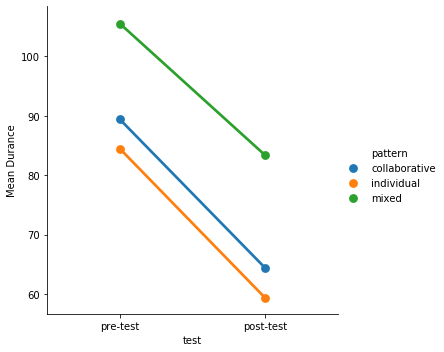

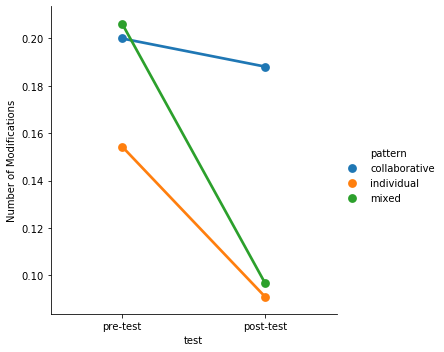

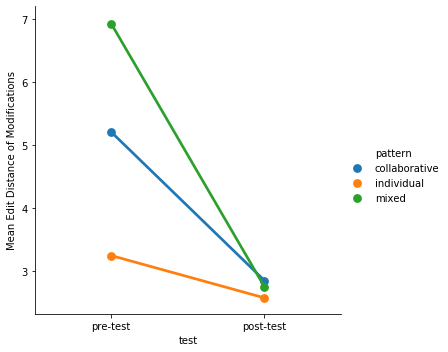

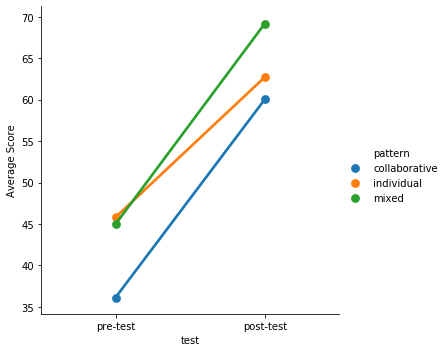

In [158]:
plot_learning_analysis_test_pattern('dur_mean','Mean Durance')
plot_learning_analysis_test_pattern('mod_num','Number of Modifications')
plot_learning_analysis_test_pattern('mod_ed_mean','Mean Edit Distance of Modifications')
plot_learning_analysis_test_pattern('score','Average Score')

# comparison of learning patterns in post-test

In [131]:
data_1=pd.read_csv('textResponses.csv')
data_1=data_1.rename(index=str, columns={"Anon Student Id": "Student_ID"})
data_1['test_type']='learning exercise'

for i in range(len(data_1)):
    try:
        data_1['Duration (sec)'][i]=float(data_1['Duration (sec)'][i])
    except:
        data_1['Duration (sec)'][i]=0.0
    if "know" in data_1['Level (Assignment)'][i]:
        data_1['test_type'][i]='pre-test'
    elif 'learned' in data_1['Level (Assignment)'][i]:
        data_1['test_type'][i]='post-test'


data_2=pd.read_csv('prepostReducedPartial.csv')
data_2['test_type']='learning exercise'

for i in range(len(data_2)):
    if "Pretest" in data_2['Test'][i]:
        data_2['test_type'][i]='pre-test'
    elif 'Posttest' in data_2['Test'][i]:
        data_2['test_type'][i]='post-test'


data_2=data_2.rename(index=str, columns={"TotalPercentage": "score",'Grade':'age','ActualCondition':'pattern'})
data_2['score']=data_2['score']*100
data_2=data_2[['Student_ID','Teacher','Gender','score','test_type','age','pattern']]
data=pd.merge(data_1, data_2, on=['Student_ID','test_type'])
for i in range(len(data)):
    if data.pattern.iloc[i][0]=='M':
        data.pattern.iloc[i]='mixed'
    if data.pattern.iloc[i][0]=='C':
        data.pattern.iloc[i]='collaborative'
    if data.pattern.iloc[i][0]=='I':
        data.pattern.iloc[i]='individual'

data.head()

D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
D:\anaconda\envs\torc

,Row,Sample Name,Transaction Id,Student_ID,Session Id,Time,Time Zone,Duration (sec),Student Response Type,Student Response Subtype,...,CF (collaborating_sessions),CF (step_id),CF (tool_event_time),CF (tutor_event_time),test_type,Teacher,Gender,score,age,pattern
0,196,All Data,bf7a5b63ef96de9709f1895361fb19f1,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:26,America/New_York,132.5,ATTEMPT,NaN,...,NaN,236.0,2016-05-02 16:26:26.214 UTC,2016-05-02 16:26:26.260 UTC,pre-test,Deley,Male,22.222222,4,mixed
1,197,All Data,38fee116e6f889f4f8947e8d3223c4e9,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:36,America/New_York,581,ATTEMPT,NaN,...,NaN,236.0,2016-05-02 16:36:09.528 UTC,2016-05-02 16:36:09.561 UTC,pre-test,Deley,Male,22.222222,4,mixed
2,3315,All Data,630a500c45ba54bd7ee5f66857df6539,Stu_005a9729f8e3869ff12b105e0f7bb82e,S97c6ad0a34e051715542a93cb0af09e4,5/9/16 12:26,America/New_York,81.5,ATTEMPT,NaN,...,NaN,236.0,2016-05-09 16:26:58.846 UTC,2016-05-09 16:26:58.896 UTC,post-test,Deley,Male,76.543210,4,mixed
3,3317,All Data,9aed6b18d9bd5b6371d871736821c853,Stu_005a9729f8e3869ff12b105e0f7bb82e,S97c6ad0a34e051715542a93cb0af09e4,5/9/16 12:29,America/New_York,60.5,ATTEMPT,NaN,...,NaN,236.0,2016-05-09 16:29:02.449 UTC,2016-05-09 16:29:02.504 UTC,post-test,Deley,Male,76.543210,4,mixed
4,3983,All Data,5605ac32fa79cc8760df9c91f047dba4,Stu_03af0deb60a1b42c70c4d71b3f9f8bed,S8149b22ef12e3677674b1030a1e98fb0,5/16/16 9:42,America/New_York,151,ATTEMPT,NaN,...,NaN,236.0,2016-05-16 13:42:30.808 UTC,2016-05-16 13:42:30.850 UTC,pre-test,Shields,Male,11.111111,5,individual


In [132]:
group_data=data.groupby(['Student_ID','Level (Assignment)','Problem Name'])[['Duration (sec)','Input','Problem Name','age','test_type','pattern','score']]

In [133]:
data_rows=[temp_row for temp_row in group_data]
data_rows[10][1]

,Row,Sample Name,Transaction Id,Student_ID,Session Id,Time,Time Zone,Duration (sec),Student Response Type,Student Response Subtype,...,CF (collaborating_sessions),CF (step_id),CF (tool_event_time),CF (tutor_event_time),test_type,Teacher,Gender,score,age,pattern
10,9751,All Data,c2d067a21919c862fcb72afcab88953a,Stu_03c1e9a4dde8c645a7554f75a1f33ea7,S78bc17f8e1457ad95af2a88025c642a5,3/1/16 10:29,America/New_York,144,ATTEMPT,NaN,...,NaN,236.0,2016-03-01 15:29:38.643 UTC,2016-03-01 15:29:38.683 UTC,post-test,Marchiona,Female,60.493827,4,mixed


In [134]:
from nltk.metrics import edit_distance
ind_end=[]
ind_grade=[]
ind_score=[]
ind_mod=[]
ind_num=[]

col_end=[]
col_grade=[]
col_score=[]
col_mod=[]
col_num=[]

mix_end=[]
mix_grade=[]
mix_score=[]
mix_mod=[]
mix_num=[]

for temp_row in data_rows:
         
                                
    if temp_row[1].pattern.iloc[0]=='individual':
        temp_df=temp_row[1]
        temp_df=temp_df[temp_df.test_type=='post-test']
        temp_mean_grade=np.mean(temp_df['age'])
        temp_mean_score=np.mean(temp_df['score'])
        ind_grade.append(temp_mean_grade)
        ind_score.append(temp_mean_score)
        
        temp_durance_mean=np.mean(temp_row[1]['Duration (sec)'])
        ind_end.append(temp_durance_mean)
        
        temp_mod_num=len(temp_df.Input)
        temp_mod_ed_list=[]
        for temp_text in temp_df.Input:
            try:
                temp_ed=edit_distance(temp_text,last_text)
                temp_mod_ed_list.append(temp_ed) 
            except:
                a=0
            last_text=temp_text
        try:
            del last_text
        except:
            a=0
        temp_mod_ed_list=np.array(temp_mod_ed_list)
        if len(temp_mod_ed_list)>=1:
            temp_mod_mean=np.mean(temp_mod_ed_list)/len(temp_mod_ed_list)
            temp_mod_sum=np.sum(temp_mod_ed_list)
        else:
            temp_mod_mean=0
            temp_mod_sum=0
        
        ind_num.append(temp_mod_num)
        ind_mod.append(temp_mod_mean)
        #post_mod_ed_sum.append(temp_mod_sum)
    
    if temp_row[1].pattern.iloc[0]=='collaborative':
        temp_df=temp_row[1]
        temp_df=temp_df[temp_df.test_type=='post-test']
        temp_mean_grade=np.mean(temp_df['age'])
        temp_mean_score=np.mean(temp_df['score'])
        col_grade.append(temp_mean_grade)
        col_score.append(temp_mean_score)
        
        temp_durance_mean=np.mean(temp_row[1]['Duration (sec)'])
        col_end.append(temp_durance_mean)
        
        temp_mod_num=len(temp_df.Input)
        temp_mod_ed_list=[]
        for temp_text in temp_df.Input:
            try:
                temp_ed=edit_distance(temp_text,last_text)
                temp_mod_ed_list.append(temp_ed) 
            except:
                a=0
            last_text=temp_text
        try:
            del last_text
        except:
            a=0
        temp_mod_ed_list=np.array(temp_mod_ed_list)
        if len(temp_mod_ed_list)>=1:
            temp_mod_mean=np.mean(temp_mod_ed_list)/len(temp_mod_ed_list)
            temp_mod_sum=np.sum(temp_mod_ed_list)
        else:
            temp_mod_mean=0
            temp_mod_sum=0
        
        col_num.append(temp_mod_num)
        col_mod.append(temp_mod_mean)
        #post_mod_ed_sum.append(temp_mod_sum)

    if temp_row[1].pattern.iloc[0]=='mixed':
        temp_df=temp_row[1]
        temp_df=temp_df[temp_df.test_type=='post-test']
        temp_mean_grade=np.mean(temp_df['age'])
        temp_mean_score=np.mean(temp_df['score'])
        mix_grade.append(temp_mean_grade)
        mix_score.append(temp_mean_score)
        
        temp_durance_mean=np.mean(temp_row[1]['Duration (sec)'])
        mix_end.append(temp_durance_mean)
        
        temp_mod_num=len(temp_df.Input)
        temp_mod_ed_list=[]
        for temp_text in temp_df.Input:
            try:
                temp_ed=edit_distance(temp_text,last_text)
                temp_mod_ed_list.append(temp_ed) 
            except:
                a=0
            last_text=temp_text
        try:
            del last_text
        except:
            a=0
        temp_mod_ed_list=np.array(temp_mod_ed_list)
        if len(temp_mod_ed_list)>=1:
            temp_mod_mean=np.mean(temp_mod_ed_list)/len(temp_mod_ed_list)
            temp_mod_sum=np.sum(temp_mod_ed_list)
        else:
            temp_mod_mean=0
            temp_mod_sum=0
        
        mix_num.append(temp_mod_num)
        mix_mod.append(temp_mod_mean)
        #post_mod_ed_sum.append(temp_mod_sum)

In [135]:
stats.f_oneway(ind_end, col_end,mix_end)

F_onewayResult(statistic=13.867307162151874, pvalue=1.122764529734463e-06)

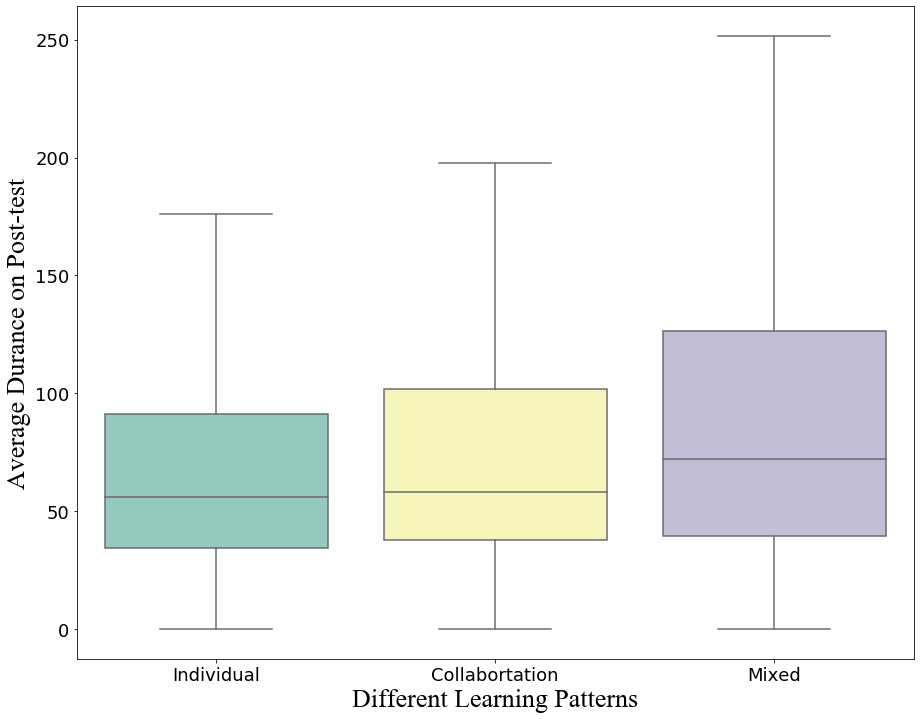

In [136]:
patterns=["Individual"]*len(ind_end)+ ['Collabortation']*len(col_end)+['Mixed']*len(mix_end)
values=np.concatenate((ind_end,col_end,mix_end))
fig,axes = plt.subplots(1,1,figsize=(15,12))
my_data = pd.DataFrame({
    "Different Learning Patterns":patterns,
    "Average Durance on Post-test":values
})

ax = sns.boxplot(x="Different Learning Patterns", y="Average Durance on Post-test", data=my_data,palette="Set3",showfliers = False)
#plt.ylim(-25,0)
plt.tick_params(labelsize=18)
axes.set_xlabel('Different Learning Patterns',font2)
axes.set_ylabel('Average Durance on Post-test',font2)
labels = axes.get_xticklabels() + axes.get_yticklabels()
#[label.set_fontname('Times New Roman') for label in labels]

In [137]:
stats.f_oneway(ind_num, col_num,mix_num)

F_onewayResult(statistic=2.9831318037624475, pvalue=0.051033285601787194)

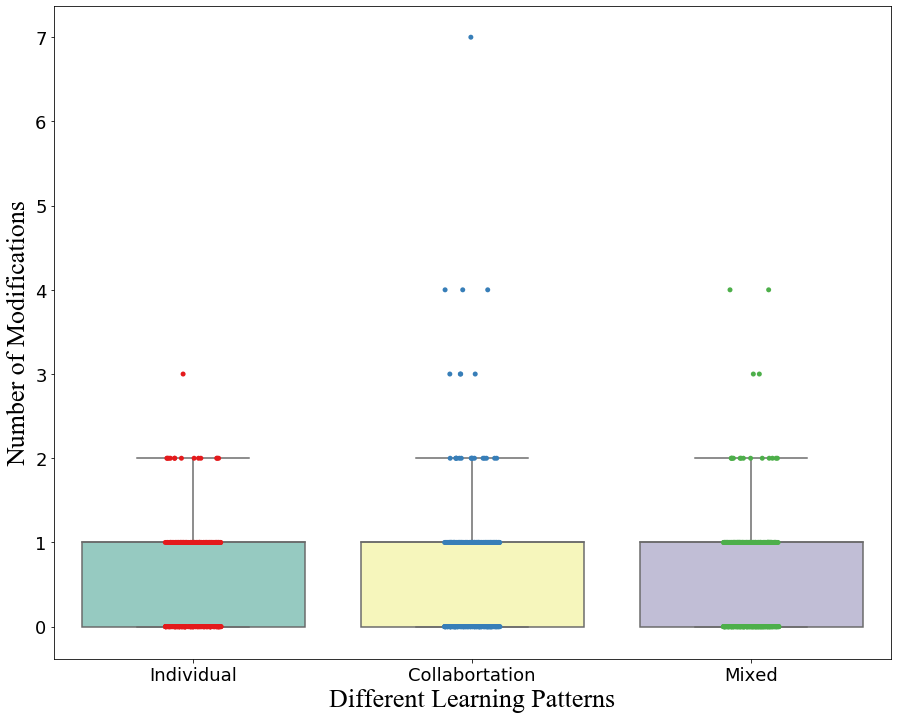

In [138]:
patterns=["Individual"]*len(ind_num)+ ['Collabortation']*len(col_num)+['Mixed']*len(mix_num)
values=np.concatenate((ind_num,col_num,mix_num))
fig,axes = plt.subplots(1,1,figsize=(15,12))
my_data = pd.DataFrame({
    "Different Learning Patterns":patterns,
    "Number of Modifications":values
})

ax = sns.boxplot(x="Different Learning Patterns", y="Number of Modifications", data=my_data,palette="Set3",showfliers = False)
ax = sns.stripplot(x="Different Learning Patterns", y="Number of Modifications", data=my_data,jitter=True,edgecolor='grey',size=5,palette="Set1")
#plt.ylim(-25,0)
plt.tick_params(labelsize=18)
axes.set_xlabel('Different Learning Patterns',font2)
axes.set_ylabel('Number of Modifications',font2)
labels = axes.get_xticklabels() + axes.get_yticklabels()
#[label.set_fontname('Times New Roman') for label in labels]

In [139]:
stats.f_oneway(ind_mod, col_mod,mix_mod)

F_onewayResult(statistic=0.044526302265630265, pvalue=0.956452122446584)

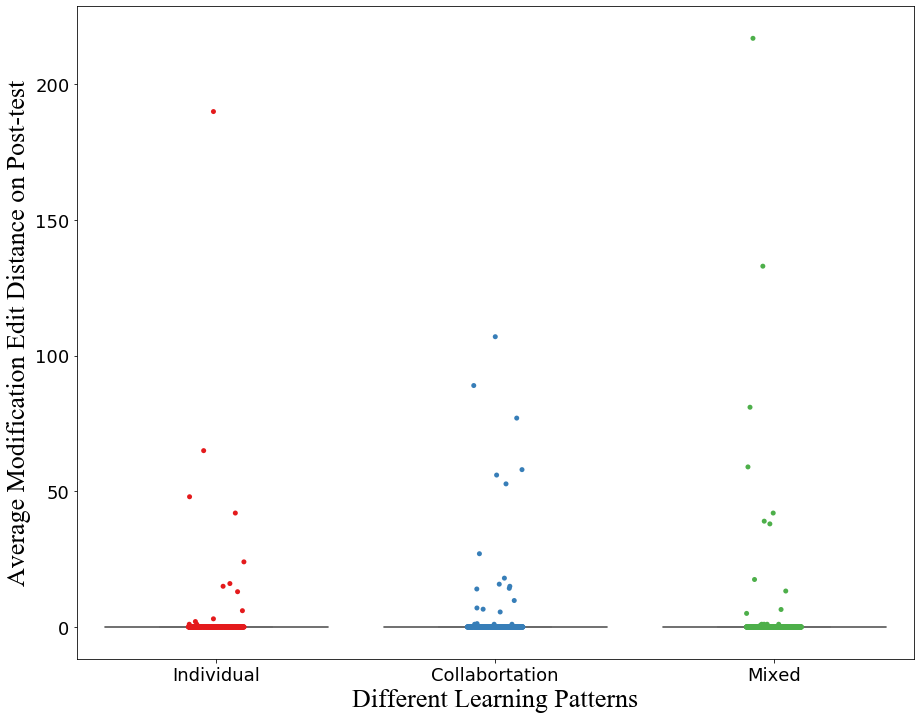

In [140]:
patterns=["Individual"]*len(ind_mod)+ ['Collabortation']*len(col_mod)+['Mixed']*len(mix_mod)
values=np.concatenate((ind_mod,col_mod,mix_mod))
fig,axes = plt.subplots(1,1,figsize=(15,12))
my_data = pd.DataFrame({
    "Different Learning Patterns":patterns,
    "Average Modification Edit Distance on Post-test":values
})

ax = sns.boxplot(x="Different Learning Patterns", y="Average Modification Edit Distance on Post-test", data=my_data,palette="Set3",showfliers = False)
ax = sns.stripplot(x="Different Learning Patterns", y="Average Modification Edit Distance on Post-test", data=my_data,jitter=True,edgecolor='grey',size=5,palette="Set1")

#plt.ylim(-25,0)
plt.tick_params(labelsize=18)
axes.set_xlabel('Different Learning Patterns',font2)
axes.set_ylabel('Average Modification Edit Distance on Post-test',font2)
labels = axes.get_xticklabels() + axes.get_yticklabels()
#[label.set_fontname('Times New Roman') for label in labels]

In [141]:
ind_score=np.array(ind_score)
ind_score=ind_score[ind_score>0]
col_score=np.array(col_score)
col_score=col_score[col_score>0]
mix_score=np.array(mix_score)
mix_score=mix_score[mix_score>0]

D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.
D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  


In [142]:
stats.f_oneway(ind_score, col_score,mix_score)

F_onewayResult(statistic=9.44316179227892, pvalue=9.160173148276961e-05)

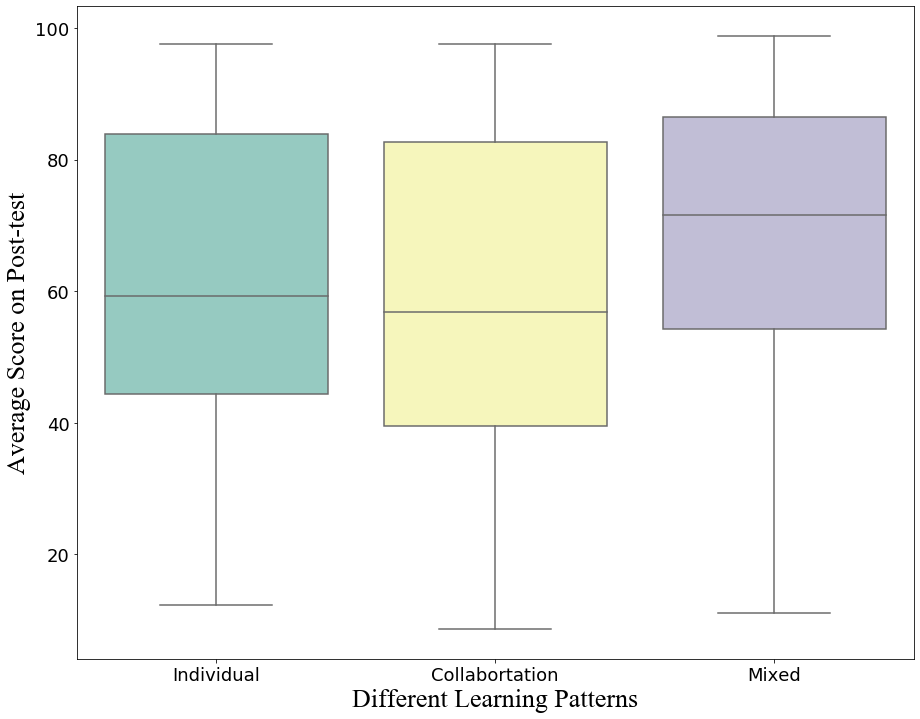

In [143]:
patterns=["Individual"]*len(ind_score)+ ['Collabortation']*len(col_score)+['Mixed']*len(mix_score)
values=np.concatenate((ind_score,col_score,mix_score))
fig,axes = plt.subplots(1,1,figsize=(15,12))
my_data = pd.DataFrame({
    "Different Learning Patterns":patterns,
    "Average Score on Post-test":values
})

ax = sns.boxplot(x="Different Learning Patterns", y="Average Score on Post-test", data=my_data,palette="Set3",showfliers = False)
#plt.ylim(-25,0)
plt.tick_params(labelsize=18)
axes.set_xlabel('Different Learning Patterns',font2)
axes.set_ylabel('Average Score on Post-test',font2)
labels = axes.get_xticklabels() + axes.get_yticklabels()
#[label.set_fontname('Times New Roman') for label in labels]

In [144]:
data.head()

,Row,Sample Name,Transaction Id,Student_ID,Session Id,Time,Time Zone,Duration (sec),Student Response Type,Student Response Subtype,...,CF (collaborating_sessions),CF (step_id),CF (tool_event_time),CF (tutor_event_time),test_type,Teacher,Gender,score,age,pattern
0,196,All Data,bf7a5b63ef96de9709f1895361fb19f1,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:26,America/New_York,132.5,ATTEMPT,NaN,...,NaN,236.0,2016-05-02 16:26:26.214 UTC,2016-05-02 16:26:26.260 UTC,pre-test,Deley,Male,22.222222,4,mixed
1,197,All Data,38fee116e6f889f4f8947e8d3223c4e9,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:36,America/New_York,581,ATTEMPT,NaN,...,NaN,236.0,2016-05-02 16:36:09.528 UTC,2016-05-02 16:36:09.561 UTC,pre-test,Deley,Male,22.222222,4,mixed
2,3315,All Data,630a500c45ba54bd7ee5f66857df6539,Stu_005a9729f8e3869ff12b105e0f7bb82e,S97c6ad0a34e051715542a93cb0af09e4,5/9/16 12:26,America/New_York,81.5,ATTEMPT,NaN,...,NaN,236.0,2016-05-09 16:26:58.846 UTC,2016-05-09 16:26:58.896 UTC,post-test,Deley,Male,76.543210,4,mixed
3,3317,All Data,9aed6b18d9bd5b6371d871736821c853,Stu_005a9729f8e3869ff12b105e0f7bb82e,S97c6ad0a34e051715542a93cb0af09e4,5/9/16 12:29,America/New_York,60.5,ATTEMPT,NaN,...,NaN,236.0,2016-05-09 16:29:02.449 UTC,2016-05-09 16:29:02.504 UTC,post-test,Deley,Male,76.543210,4,mixed
4,3983,All Data,5605ac32fa79cc8760df9c91f047dba4,Stu_03af0deb60a1b42c70c4d71b3f9f8bed,S8149b22ef12e3677674b1030a1e98fb0,5/16/16 9:42,America/New_York,151,ATTEMPT,NaN,...,NaN,236.0,2016-05-16 13:42:30.808 UTC,2016-05-16 13:42:30.850 UTC,pre-test,Shields,Male,11.111111,5,individual


In [145]:
test_data_index=[]
for i in range(len(data)):
    if (data.test_type.iloc[i]=='pre-test' or data.test_type.iloc[i]=='post-test') and data['Is Last Attempt'].iloc[i]:
        test_data_index.append(i)

In [146]:
test_data=data.iloc[test_data_index]

In [147]:
group_test_data=test_data.groupby(['Student_ID','Problem Name'])[['Is Last Attempt', 'Input','test_type','pattern']]

In [148]:
test_data_rows=[temp_row for temp_row in group_test_data]
test_data_rows[110][1]

,Row,Sample Name,Transaction Id,Student_ID,Session Id,Time,Time Zone,Duration (sec),Student Response Type,Student Response Subtype,...,CF (collaborating_sessions),CF (step_id),CF (tool_event_time),CF (tutor_event_time),test_type,Teacher,Gender,score,age,pattern
236,197292,All Data,69810f9485a7d2eb6198aa98182dff8c,Stu_2de7d6a75d744761e02a68979dcb87c4,S6c428ae6f1065a0b5de955aa7ae9bb02,5/9/16 9:32,America/New_York,109,ATTEMPT,NaN,...,NaN,236.0,2016-05-09 13:32:43.794 UTC,2016-05-09 13:32:43.848 UTC,pre-test,Shaffer,Female,92.592593,5,collaborative
238,199447,All Data,8336b68785f4256bd42035fde04afdcc,Stu_2de7d6a75d744761e02a68979dcb87c4,S063541ecde3bec14b50b6864e6e2ab09,5/13/16 9:14,America/New_York,108,ATTEMPT,NaN,...,NaN,236.0,2016-05-13 13:14:39.915 UTC,2016-05-13 13:14:39.944 UTC,post-test,Shaffer,Female,91.358025,5,collaborative


In [149]:
test_data_rows[110][1].test_type

236     pre-test
238    post-test
Name: test_type, dtype: object

In [150]:
test_data_rows[110][1]['Level (Assignment)']

236       Show what you know B
238    Show what you learned A
Name: Level (Assignment), dtype: object

In [151]:
test_data_rows[110][1].Input

236    Kia is wrong because she is just doing imple s...
238    She is wrong because if you added them with th...
Name: Input, dtype: object

In [152]:
cnt=0
for temp in test_data_rows:
    if len(temp[1])>1:
        cnt+=1

In [153]:
cnt

522

In [154]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
  
def compute_similarity(X,Y):  
    # tokenization 
    X_list = word_tokenize(X)  
    Y_list = word_tokenize(Y) 

    # sw contains the list of stopwords   
    l1 =[];l2 =[] 

    # remove stop words from string 
    X_set = {w for w in X_list }  
    Y_set = {w for w in Y_list } 

    # form a set containing keywords of both strings  
    rvector = X_set.union(Y_set)  
    for w in rvector: 
        if w in X_set: l1.append(1) # create a vector 
        else: l1.append(0) 
        if w in Y_set: l2.append(1) 
        else: l2.append(0) 
    c = 0

    # cosine formula  
    for i in range(len(rvector)): 
            c+= l1[i]*l2[i] 
    cosine = c / float((sum(l1)*sum(l2))**0.5) 
    return cosine

In [155]:
compute_similarity('i like it', 'i do not hate it')

0.5163977794943222

In [156]:
from nltk.metrics import edit_distance
ind_sim=[]
col_sim=[]
mix_sim=[]

for temp_row in test_data_rows:
         
                                
    if temp_row[1].pattern.iloc[0]=='individual':
        temp_df=temp_row[1]
        
        try:
            temp_pre_answer=temp_df[temp_df.test_type=='pre-test']['Input'].iloc[0]
            temp_post_answer=temp_df[temp_df.test_type=='post-test']['Input'].iloc[0]
            temp_sim=compute_similarity(temp_pre_answer,temp_post_answer)
            ind_sim.append(temp_sim)
        except:
            continue
        
    
    if temp_row[1].pattern.iloc[0]=='collaborative':
        temp_df=temp_row[1]
        try:
            temp_pre_answer=temp_df[temp_df.test_type=='pre-test']['Input'].iloc[0]
            temp_post_answer=temp_df[temp_df.test_type=='post-test']['Input'].iloc[0]
            temp_sim=compute_similarity(temp_pre_answer,temp_post_answer)
            col_sim.append(temp_sim)
        except:
            continue

    if temp_row[1].pattern.iloc[0]=='mixed':
        temp_df=temp_row[1]
        try:
            temp_pre_answer=temp_df[temp_df.test_type=='pre-test']['Input'].iloc[0]
            temp_post_answer=temp_df[temp_df.test_type=='post-test']['Input'].iloc[0]
            temp_sim=compute_similarity(temp_pre_answer,temp_post_answer)
            mix_sim.append(temp_sim)
        except:
            continue

In [157]:
stats.f_oneway(ind_sim, col_sim,mix_sim)

F_onewayResult(statistic=3.882012063940048, pvalue=0.021210439389545758)

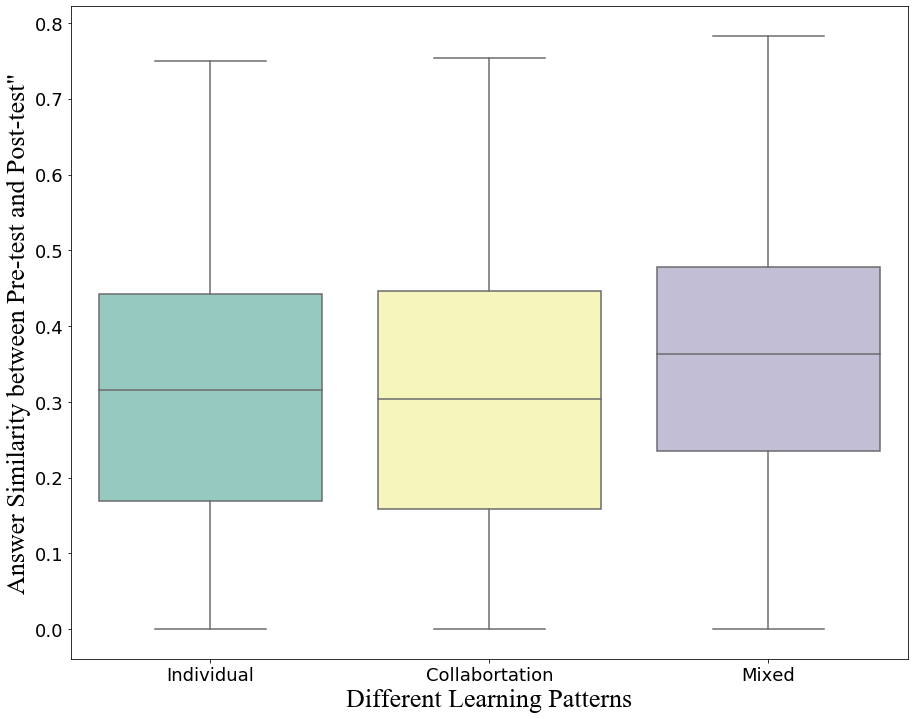

In [158]:
patterns=["Individual"]*len(ind_sim)+ ['Collabortation']*len(col_sim)+['Mixed']*len(mix_sim)
values=np.concatenate((ind_sim,col_sim,mix_sim))
fig,axes = plt.subplots(1,1,figsize=(15,12))
my_data = pd.DataFrame({
    "Different Learning Patterns":patterns,
    "Answer Similarity between Pre-test and Post-test":values
})

ax = sns.boxplot(x="Different Learning Patterns", y="Answer Similarity between Pre-test and Post-test", data=my_data,palette="Set3",showfliers = False)
#plt.ylim(-25,0)
plt.tick_params(labelsize=18)
axes.set_xlabel('Different Learning Patterns',font2)
axes.set_ylabel('Answer Similarity between Pre-test and Post-test"',font2)
labels = axes.get_xticklabels() + axes.get_yticklabels()
#[label.set_fontname('Times New Roman') for label in labels]

# Analysis of Number of Answering Questions in learning process

In [69]:
data=pd.read_csv('textResponses.csv')
data['pattern']=''
for i in range(len(data)):
    try:
        data['Duration (sec)'][i]=float(data['Duration (sec)'][i])
    except:
        data['Duration (sec)'][i]=0.0
    if data['Level (Assignment)'][i][-1]=='n':
        data['pattern'][i]='collaborative'
    elif data['Level (Assignment)'][i][-1]=='l':
        data['pattern'][i]='individual'
    else:
        data['pattern'][i]='test'

D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
D:\anaconda\envs\torch\lib\site-packages\ipykernel_launche

In [70]:
group_data=data.groupby(['Anon Student Id','Level (Assignment)'])[['Duration (sec)','pattern','Input','Problem Name']]

In [71]:
data_rows=[temp_row for temp_row in group_data]

In [72]:
data_rows[26][1]

,Row,Sample Name,Transaction Id,Anon Student Id,Session Id,Time,Time Zone,Duration (sec),Student Response Type,Student Response Subtype,...,School,Class,CF (Completion History),CF (Team ID),CF (Team Position),CF (collaborating_sessions),CF (step_id),CF (tool_event_time),CF (tutor_event_time),pattern
96,14996,All Data,d54ea501a8d5eb573dfe242be809c9d7,Stu_049d4b0e20a592319973093bdf412b18,S4967155914b09be44306146c0990b267,5/6/16 11:15,America/New_York,191,ATTEMPT,NaN,...,Collaboration at Montour School District,Rongaus 2,"1,1,1,1,0,0,0,0,0,0,0,0,0,0,0",NaN,NaN,NaN,236.0,2016-05-06 15:15:44.616 UTC,2016-05-06 15:15:44.665 UTC,test
97,14998,All Data,5cac1c544ed0ae38a008891281848628,Stu_049d4b0e20a592319973093bdf412b18,Sc54fd753a243209a1e579bc77f9c5f93,5/6/16 11:56,America/New_York,178,ATTEMPT,NaN,...,Collaboration at Montour School District,Rongaus 2,"1,1,1,1,1,0,0,0,0,0,0,0,0,0,0",NaN,NaN,NaN,236.0,2016-05-06 15:56:08.212 UTC,2016-05-06 15:56:08.302 UTC,test


In [73]:
ind_num_qa=[]
col_num_qa=[]

for temp_row in data_rows:
    if temp_row[1].pattern.iloc[0]=='collaborative':
        temp_num_qa=len(temp_row[1]['Problem Name'].value_counts())
        col_num_qa.append(temp_num_qa)
                        
            
            
                                
    elif temp_row[1].pattern.iloc[0]=='individual':
        temp_num_qa=len(temp_row[1]['Problem Name'].value_counts())
        ind_num_qa.append(temp_num_qa)

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 26,
}

In [75]:
stats.ttest_ind(ind_num_qa,col_num_qa,equal_var = False)

Ttest_indResult(statistic=14.070915768536105, pvalue=8.817895176993357e-39)

In [76]:
stats.f_oneway(ind_num_qa, col_num_qa)

F_onewayResult(statistic=196.93728532057239, pvalue=2.412317082976386e-41)

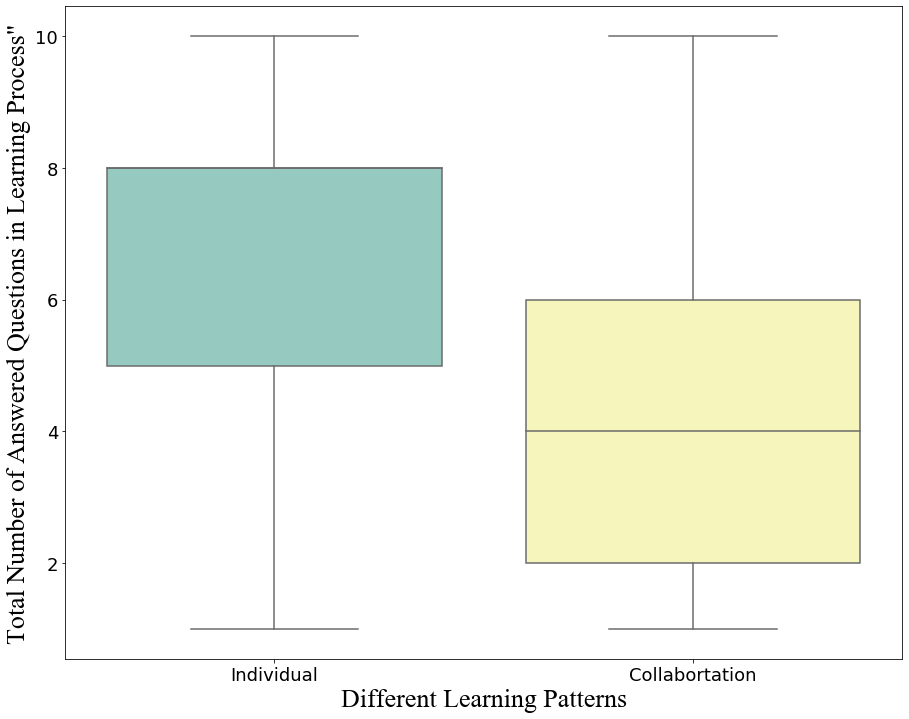

In [77]:
patterns=["Individual"]*len(ind_num_qa)+ ['Collabortation']*len(col_num_qa)
values=np.concatenate((ind_num_qa,col_num_qa))
fig,axes = plt.subplots(1,1,figsize=(15,12))
my_data = pd.DataFrame({
    "Different Learning Patterns":patterns,
    "Total Number of Answered Questions in Learning Process":values
})

ax = sns.boxplot(x="Different Learning Patterns", 
                 y="Total Number of Answered Questions in Learning Process", data=my_data,palette="Set3",showfliers = False)
#plt.ylim(-25,0)
plt.tick_params(labelsize=18)
axes.set_xlabel('Different Learning Patterns',font2)
axes.set_ylabel('Total Number of Answered Questions in Learning Process"',font2)
labels = axes.get_xticklabels() + axes.get_yticklabels()
#[label.set_fontname('Times New Roman') for label in labels]

### interaction effect

In [78]:
teach_data=pd.read_csv('prepostReducedPartial.csv')
teach_data_reduced=teach_data[['Student_ID','Teacher','Gender','Grade']]
teach_data_reduced=teach_data_reduced.rename(index=str, columns={'Grade':'age'})
data=data.rename(index=str, columns={"Anon Student Id": "Student_ID"})
new_data=pd.merge(data, teach_data_reduced, on='Student_ID')

In [79]:
group_data=new_data.groupby(['Student_ID','Level (Assignment)'])
data_rows=[temp_row for temp_row in group_data]

In [85]:
num_qa=[]

patterns=[]
genders=[]
teachers=[]
ages=[]


for temp_row in data_rows:
    if temp_row[1].pattern.iloc[0]=='collaborative' or temp_row[1].pattern.iloc[0]=='individual':
        temp_num_qa=len(temp_row[1]['Problem Name'].value_counts())
        num_qa.append(temp_num_qa)

        temp_gender=temp_row[1].Gender.iloc[0]
        temp_pattern=temp_row[1].pattern.iloc[0]
        temp_teacher=temp_row[1].Teacher.iloc[0]
        temp_age=temp_row[1].age.iloc[0]
        ages.append(temp_age)
        patterns.append(temp_pattern)
        genders.append(temp_gender)
        teachers.append(temp_teacher)
   

In [90]:
cnt=1
teacher_dict={}
for i in range(len(teachers)):
    temp_teacher=teachers[i]
    try:
        teachers[i]=teacher_dict[temp_teacher]
    except:
        if cnt<=10:
            teacher_dict[temp_teacher]='Teacher 0'+str(cnt)
        else:
            teacher_dict[temp_teacher]='Teacher '+str(cnt)
        teachers[i]=teacher_dict[temp_teacher]
        cnt+=1

In [91]:
ana_df=pd.DataFrame({'num_qa':np.array(num_qa),'Age Level':np.array(ages),
                  'pattern':np.array(patterns), 'teacher':np.array(teachers),'gender':np.array(genders)} )

In [92]:
def plot_learning_analysis(feature_1, feature_2, label_y):
    temp_col_df = ana_df[ana_df.pattern=='collaborative']
    temp_ind_df = ana_df[ana_df.pattern=='individual']
    temp_col_df= temp_col_df.groupby(feature_1)[[feature_2]].mean()
    #temp_col_df=pd.DataFrame({'col_'+'dur_mod':np.array(temp_col_df['dur_mod'])})
    temp_col_df=pd.DataFrame({feature_1:temp_col_df.index,'collaborative':np.array(temp_col_df[feature_2])})
    temp_ind_df= temp_ind_df.groupby(feature_1)[[feature_2]].mean()
    #temp_ind_df=pd.DataFrame({'ind_'+'dur_mod':np.array(temp_ind_df['dur_mod'])})
    temp_ind_df=pd.DataFrame({feature_1:temp_ind_df.index,'individual':np.array(temp_ind_df[feature_2])})
    temp_df=pd.merge(temp_ind_df,temp_col_df)
    temp_df.index=temp_df[feature_1]
    temp_df = temp_df.loc[:,['individual','collaborative']]
    temp_df = temp_df.stack()
    temp_df = temp_df.to_frame()
    temp_df.reset_index(inplace=True)
    temp_df.columns = temp_df.columns.astype(str)
    temp_df.rename(columns={"level_1":"pattern","0":label_y},inplace=True)
    sns.catplot(x="pattern", y=label_y, hue=feature_1,kind="point", data=temp_df)
    plt.show()
    

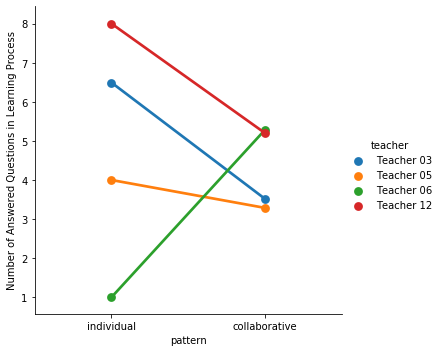

In [93]:
plot_learning_analysis('teacher','num_qa',
                       'Number of Answered Questions in Learning Process')

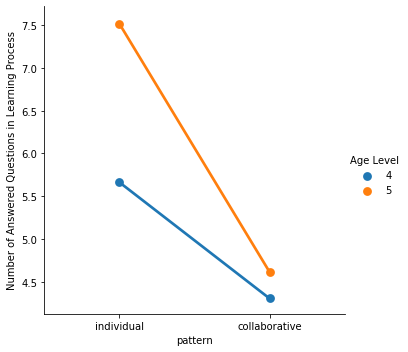

In [30]:
plot_learning_analysis('Age Level','num_qa',
                       'Number of Answered Questions in Learning Process')

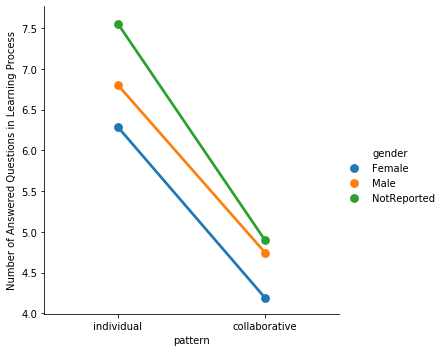

In [31]:
plot_learning_analysis('gender','num_qa',
                       'Number of Answered Questions in Learning Process')